In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('../datasets/project/Dataset_Ads.csv')

In [77]:
df.head(5)

,Age,Gender,Income,Location,Ad_Type,Ad_Topic,Ad_Placement,Clicks,Click_Time,Conversion_Rate,CTR
0,61,Male,35717.43,Urban,Banner,Travel,Social Media,3,2024-01-18 20:45:56.898459,0.0981,0.0737
1,41,Male,47453.25,Rural,Video,Travel,Search Engine,5,2023-04-24 20:45:56.898459,0.0937,0.0592
2,49,Female,68126.35,Rural,Text,Food,Social Media,4,2024-02-24 20:45:56.898459,0.1912,0.0563
3,68,Female,64585.73,Suburban,Text,Health,Website,6,2023-12-13 20:45:56.898459,0.1122,0.0232
4,63,Male,21109.40,Urban,Native,Fashion,Search Engine,5,2023-07-02 20:45:56.898459,0.1426,0.0539


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Income           10000 non-null  float64
 3   Location         10000 non-null  object 
 4   Ad_Type          10000 non-null  object 
 5   Ad_Topic         10000 non-null  object 
 6   Ad_Placement     10000 non-null  object 
 7   Clicks           10000 non-null  int64  
 8   Click_Time       10000 non-null  object 
 9   Conversion_Rate  10000 non-null  float64
 10  CTR              10000 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 859.5+ KB


In [79]:
df.describe()
print(df.isna().sum())


Age                0
Gender             0
Income             0
Location           0
Ad_Type            0
Ad_Topic           0
Ad_Placement       0
Clicks             0
Click_Time         0
Conversion_Rate    0
CTR                0
dtype: int64


In [80]:
# Great piece of code here wow.
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")
    if unique_vals < 15:  # show actual values if few
        print(df[col].unique(), "\n")


Age: 100 unique values
Gender: 3 unique values
['Male' 'Female' 'Other'] 

Income: 9994 unique values
Location: 3 unique values
['Urban' 'Rural' 'Suburban'] 

Ad_Type: 4 unique values
['Banner' 'Video' 'Text' 'Native'] 

Ad_Topic: 6 unique values
['Travel' 'Food' 'Health' 'Fashion' 'Technology' 'Finance'] 

Ad_Placement: 3 unique values
['Social Media' 'Search Engine' 'Website'] 

Clicks: 17 unique values
Click_Time: 6503 unique values
Conversion_Rate: 3955 unique values
CTR: 1008 unique values


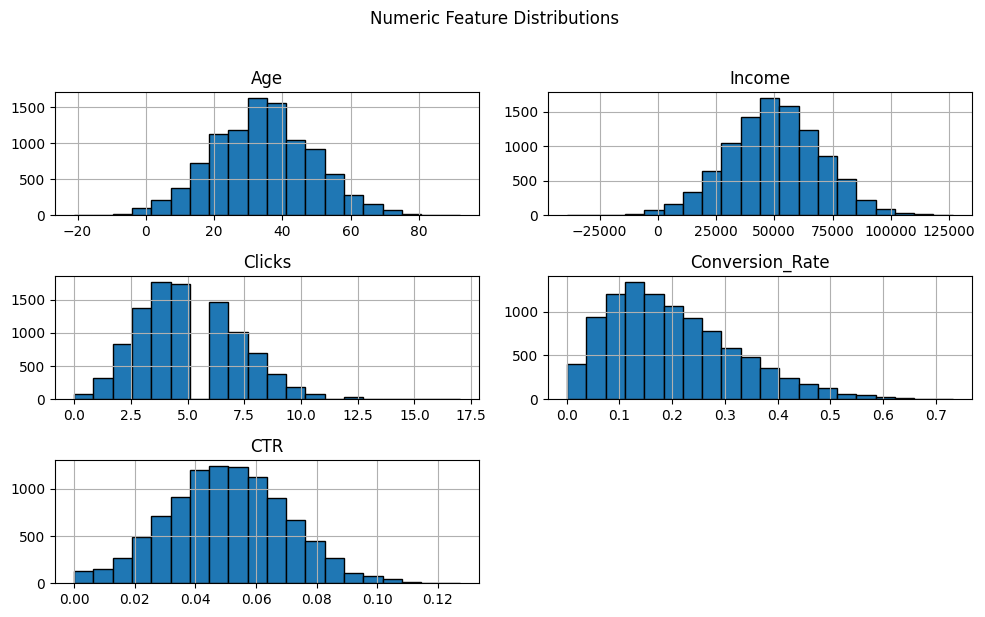

In [81]:
# okay this is good cause I need to see the distribution.
numeric_cols = ['Age', 'Income', 'Clicks', 'Conversion_Rate', 'CTR']

df[numeric_cols].hist(bins=20, figsize=(10,6), edgecolor='black')
plt.suptitle("Numeric Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()


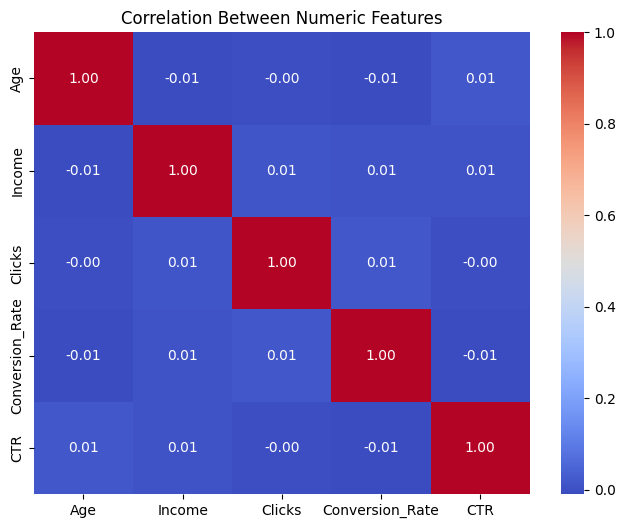

In [82]:
# This one is hard to understand tbh
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()

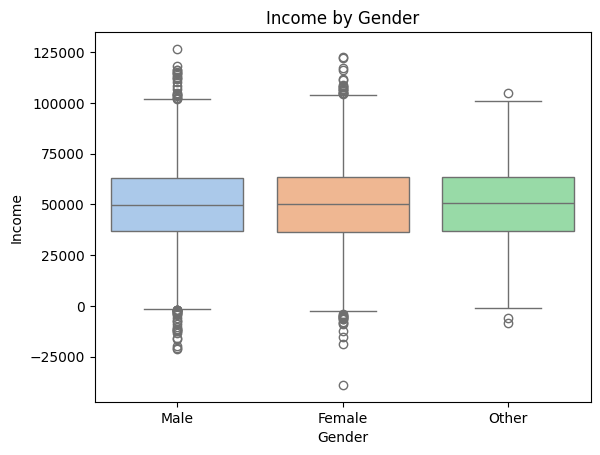

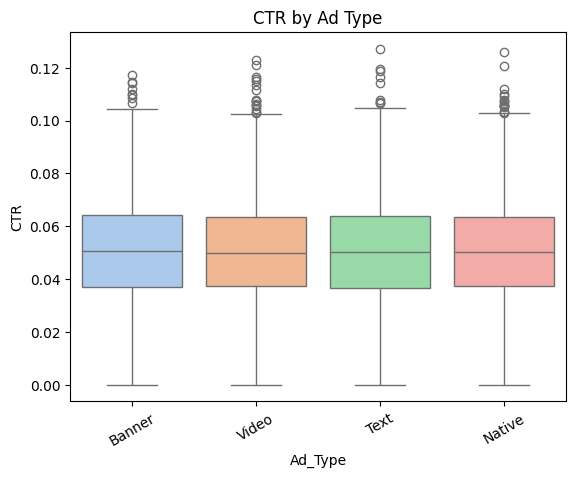

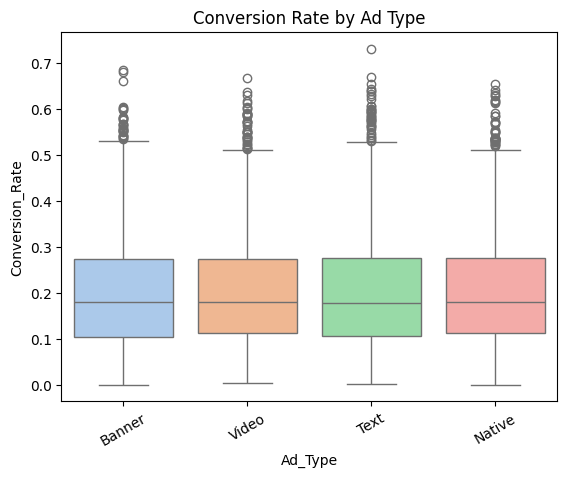

In [83]:
# THis has some interesting stuff... Hmm
sns.boxplot(data=df, x='Gender', y='Income', palette='pastel')
plt.title("Income by Gender")
plt.show()

sns.boxplot(data=df, x='Ad_Type', y='CTR', palette='pastel')
plt.title("CTR by Ad Type")
plt.xticks(rotation=30)
plt.show()

sns.boxplot(data=df, x='Ad_Type', y='Conversion_Rate', palette='pastel')
plt.title("Conversion Rate by Ad Type")
plt.xticks(rotation=30)
plt.show()


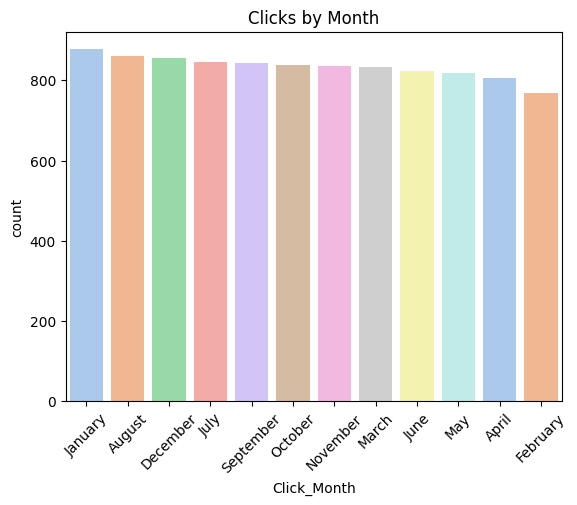

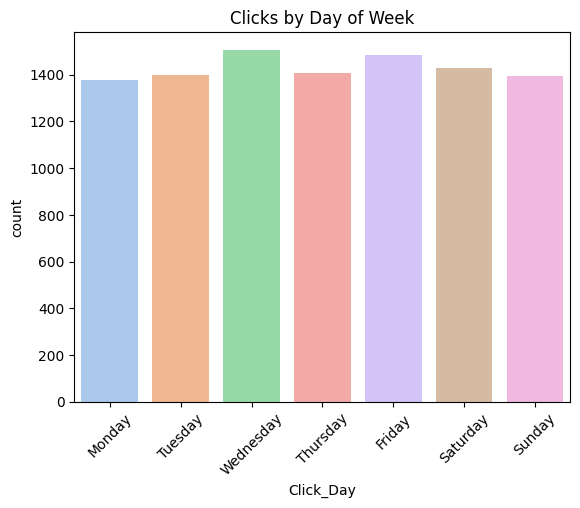

In [84]:
# I like this because now I have more time series data, and I can see when there is more clicks per month.
df['Click_Time'] = pd.to_datetime(df['Click_Time'])
df['Click_Hour'] = df['Click_Time'].dt.hour
df['Click_Month'] = df['Click_Time'].dt.month_name()
df['Click_Day'] = df['Click_Time'].dt.day_name()


sns.countplot(data=df, x='Click_Month', palette='pastel', order=df['Click_Month'].value_counts().index)
plt.title("Clicks by Month")
plt.xticks(rotation=45)
plt.show()

# # the time stamps are sort've useless because they're all only different by miliseconds...
# sns.countplot(data=df, x='Click Hour', palette='pastel', order=df['Click Hour'].value_counts().index)
# plt.title("Clicks by Month")
# plt.xticks(rotation=45)
# plt.show()

# the day it was clicked might be better actually...
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='Click_Day', palette='pastel', order=day_order)
plt.title("Clicks by Day of Week")
plt.xticks(rotation=45)
plt.show()

In [85]:
df.info()
# notice we have a datatime64 Dtype now, and then there are two new columns since we extracted data from click time.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Age              10000 non-null  int64         
 1   Gender           10000 non-null  object        
 2   Income           10000 non-null  float64       
 3   Location         10000 non-null  object        
 4   Ad_Type          10000 non-null  object        
 5   Ad_Topic         10000 non-null  object        
 6   Ad_Placement     10000 non-null  object        
 7   Clicks           10000 non-null  int64         
 8   Click_Time       10000 non-null  datetime64[ns]
 9   Conversion_Rate  10000 non-null  float64       
 10  CTR              10000 non-null  float64       
 11  Click_Hour       10000 non-null  int32         
 12  Click_Month      10000 non-null  object        
 13  Click_Day        10000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32

In [86]:
# Creates new coluns wcih idk fi 
print(df.groupby('Gender')[['Clicks', 'CTR', 'Conversion_Rate']].mean())
print(df.groupby('Ad_Type')[['Clicks', 'CTR', 'Conversion_Rate']].mean())

          Clicks       CTR  Conversion_Rate
Gender                                     
Female  5.030540  0.050767         0.201616
Male    5.035700  0.050153         0.203369
Other   5.006654  0.050425         0.199294
           Clicks       CTR  Conversion_Rate
Ad_Type                                     
Banner   5.014062  0.050403         0.200075
Native   5.079513  0.050441         0.204576
Text     5.049513  0.050205         0.201899
Video    4.980884  0.050647         0.202512


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Age              10000 non-null  int64         
 1   Gender           10000 non-null  object        
 2   Income           10000 non-null  float64       
 3   Location         10000 non-null  object        
 4   Ad_Type          10000 non-null  object        
 5   Ad_Topic         10000 non-null  object        
 6   Ad_Placement     10000 non-null  object        
 7   Clicks           10000 non-null  int64         
 8   Click_Time       10000 non-null  datetime64[ns]
 9   Conversion_Rate  10000 non-null  float64       
 10  CTR              10000 non-null  float64       
 11  Click_Hour       10000 non-null  int32         
 12  Click_Month      10000 non-null  object        
 13  Click_Day        10000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32

### Claude popped off and did a bunch of code here

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your data
df = pd.read_csv('../datasets/project/Dataset_Ads.csv')

# Data inspection and cleaning
print("="*80)
print("DATA INSPECTION")
print("="*80)
print("\nDataset shape:", df.shape)
print("\nColumn data types:")
print(df.dtypes)
print("\nFirst few rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())

# Convert Click Time to datetime if needed
df['Click_Time'] = pd.to_datetime(df['Click_Time'])

# Ensure numeric columns are properly typed
numeric_cols = ['Age', 'Income', 'Clicks', 'Conversion_Rate', 'CTR']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any rows with missing values in key columns
df_clean = df.dropna(subset=numeric_cols)
print(f"\nRows after cleaning: {len(df_clean)} (dropped {len(df) - len(df_clean)} rows)")

# Create dummy variables for categorical variables
df_encoded = pd.get_dummies(df_clean, columns=['Gender', 'Location', 'Ad_Type', 'Ad_Topic', 'Ad_Placement'], 
                             drop_first=True)

# Verify no object types remain in encoded data
print("\nEncoded data types:")
print(df_encoded.dtypes.value_counts())

print("="*80)
print("ECONOMETRIC DIAGNOSTICS ANALYSIS")
print("="*80)

# ============================================================================
# 1. ENDOGENEITY ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("1. ENDOGENEITY ANALYSIS")
print("="*80)

print("\nPotential Endogeneity Issues:")
print("-" * 40)

# Check correlation between Clicks and dependent variables
print("\n1.1 Correlation Analysis (Potential Endogeneity Red Flags):")
print("-" * 40)
corr_matrix = df_clean[['Clicks', 'CTR', 'Conversion_Rate', 'Age', 'Income']].corr()
print("\nCorrelation with Clicks (potential endogenous variable):")
print(corr_matrix['Clicks'].sort_values(ascending=False))


# Test for endogeneity using Hausman-Wu test approach
print("\n1.2 Testing for Endogeneity (Hausman-Wu Test Approach):")
print("-" * 40)

# Prepare variables for Conversion Rate model
y = df_encoded['Conversion_Rate'].values
X_vars = ['Age', 'Income', 'Clicks']
X_cats = [col for col in df_encoded.columns if col.startswith(('Gender_', 'Location_', 
          'Ad Type_', 'Ad Topic_', 'Ad Placement_'))]

# Ensure all columns exist and are numeric
available_X_vars = [v for v in X_vars if v in df_encoded.columns]
available_X_cats = [c for c in X_cats if c in df_encoded.columns]

print(f"Using {len(available_X_vars)} numeric variables: {available_X_vars}")
print(f"Using {len(available_X_cats)} categorical dummy variables")

X = df_encoded[available_X_vars + available_X_cats].astype(float)
X = add_constant(X)

# Stage 1: Regress potentially endogenous variable (Clicks) on instruments + exogenous
# Using Age and Income as instruments (assuming they're exogenous)
instruments = ['Age', 'Income'] + available_X_cats
available_instruments = [i for i in instruments if i in df_encoded.columns]
X_stage1 = df_encoded[available_instruments].astype(float)
X_stage1 = add_constant(X_stage1)

try:
    model_stage1 = OLS(df_encoded['Clicks'].astype(float).values, X_stage1).fit()
    residuals_stage1 = model_stage1.resid

    # Stage 2: Include residuals in original regression
    X_with_resid = X.copy()
    X_with_resid['clicks_residual'] = residuals_stage1
    model_stage2 = OLS(y, X_with_resid).fit()

    # Test if residual coefficient is significant
    resid_pvalue = model_stage2.pvalues['clicks_residual']
    print(f"\nResidual coefficient p-value: {resid_pvalue:.4f}")
    if resid_pvalue < 0.05:
        print("✗ ENDOGENEITY DETECTED: Clicks appears to be endogenous (p < 0.05)")
        print("  Recommendation: Use Instrumental Variables (IV) regression or 2SLS")
    else:
        print("✓ No strong evidence of endogeneity in Clicks (p ≥ 0.05)")
except Exception as e:
    print(f"⚠️  Could not complete endogeneity test: {str(e)}")
    print("   This may be due to perfect multicollinearity or data issues")

# Calculate VIF for multicollinearity (related to endogeneity)
print("\n1.3 Variance Inflation Factors (VIF) - Multicollinearity Check:")
print("-" * 40)
try:
    X_vif = df_encoded[['Age', 'Income', 'Clicks']].astype(float)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_vif.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    print(vif_data)
    print("\nVIF > 10 suggests high multicollinearity (potential endogeneity concern)")
except Exception as e:
    print(f"⚠️  Could not calculate VIF: {str(e)}")


DATA INSPECTION

Dataset shape: (10000, 11)

Column data types:
Age                  int64
Gender              object
Income             float64
Location            object
Ad_Type             object
Ad_Topic            object
Ad_Placement        object
Clicks               int64
Click_Time          object
Conversion_Rate    float64
CTR                float64
dtype: object

First few rows:
   Age  Gender    Income  Location Ad_Type Ad_Topic   Ad_Placement  Clicks  \
0   61    Male  35717.43     Urban  Banner   Travel   Social Media       3   
1   41    Male  47453.25     Rural   Video   Travel  Search Engine       5   
2   49  Female  68126.35     Rural    Text     Food   Social Media       4   
3   68  Female  64585.73  Suburban    Text   Health        Website       6   
4   63    Male  21109.40     Urban  Native  Fashion  Search Engine       5   

                   Click_Time  Conversion_Rate     CTR  
0  2024-01-18 20:45:56.898459           0.0981  0.0737  
1  2023-04-24 20:45:56.89

I want to do one more endogenity test I think...

Clicks as a weak correlation with the other numerical variables. Doesn't rule it out, since it could still be tied up with the error term.

After running the Hausman-Wu test I found that when regressing clicks on the other assumed exogenous variables [list] TODO that the residuls from the first stage had a very small p-value meaning high significance that Clicks is endogenous.

Did a quick multicollinearity check as well and looks like predictors in the dataset aren't highly correlated with each other.

In [89]:
# endogeneity test here!


2. HETEROSKEDASTICITY ANALYSIS

2.1 Breusch-Pagan Test:
----------------------------------------
LM Statistic: 3.0970
LM-Test p-value: 0.8759
F-Statistic: 0.4422
F-Test p-value: 0.8760
✓ No strong evidence of heteroskedasticity (p ≥ 0.05)

2.2 White Test:
----------------------------------------
LM Statistic: 23.4231
LM-Test p-value: 0.7568
F-Statistic: 0.8072
F-Test p-value: 0.7574
✓ No strong evidence of heteroskedasticity (p ≥ 0.05)

2.3 Visual Inspection:
----------------------------------------
Generating residual plots...


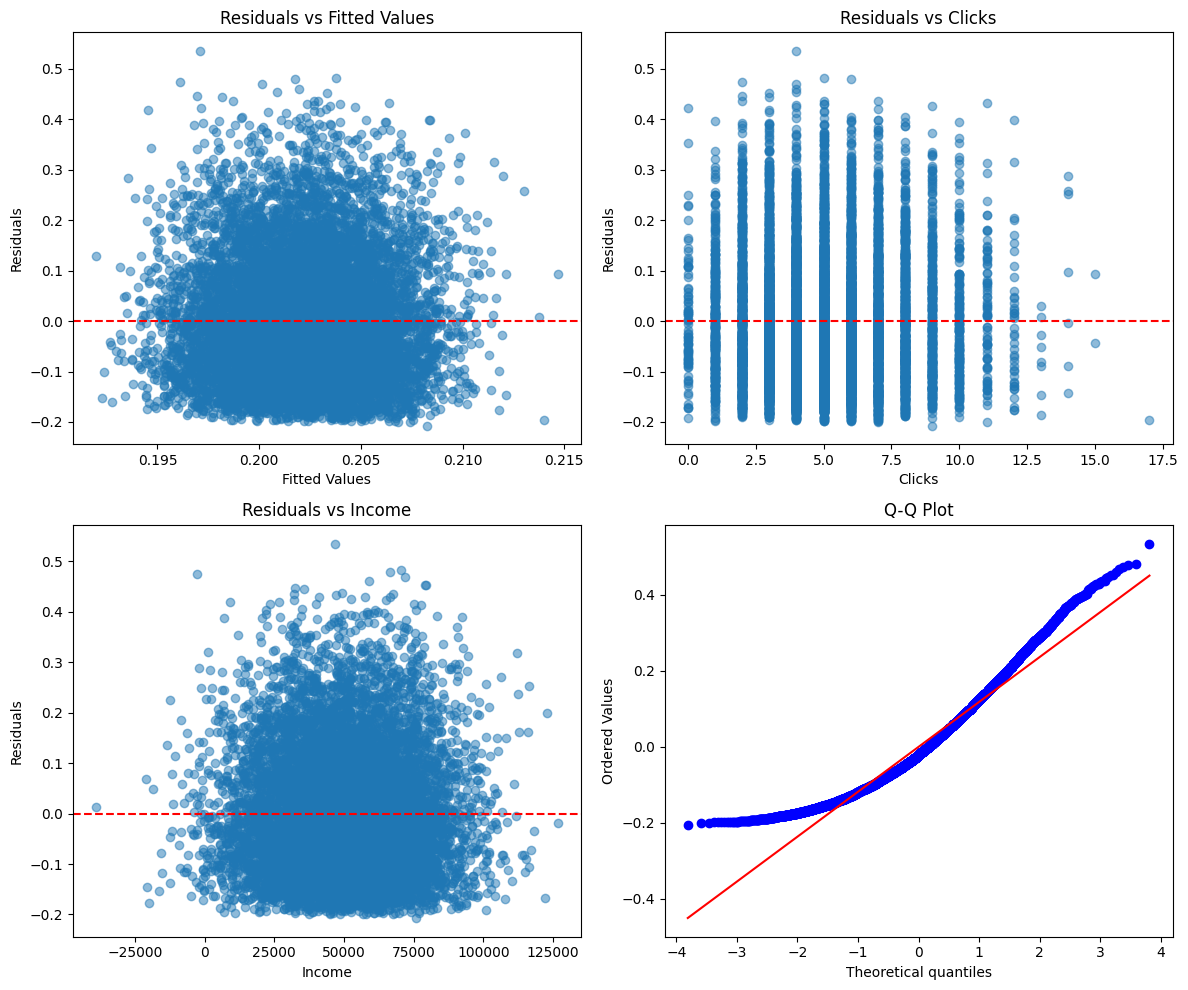

In [90]:

# ============================================================================
# 2. HETEROSKEDASTICITY TESTS
# ============================================================================
print("\n" + "="*80)
print("2. HETEROSKEDASTICITY ANALYSIS")
print("="*80)

# Run base model for heteroskedasticity tests
try:
    base_model = OLS(y, X).fit()
    
    # Breusch-Pagan Test
    print("\n2.1 Breusch-Pagan Test:")
    print("-" * 40)
    bp_test = het_breuschpagan(base_model.resid, X)
    labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
    bp_results = dict(zip(labels, bp_test))
    for key, val in bp_results.items():
        print(f"{key}: {val:.4f}")

    if bp_results['LM-Test p-value'] < 0.05:
        print("✗ HETEROSKEDASTICITY DETECTED (p < 0.05)")
        print("  Recommendation: Use robust standard errors (HC1, HC3) or WLS")
    else:
        print("✓ No strong evidence of heteroskedasticity (p ≥ 0.05)")

    # White Test
    print("\n2.2 White Test:")
    print("-" * 40)
    white_test = het_white(base_model.resid, X)
    labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
    white_results = dict(zip(labels, white_test))
    for key, val in white_results.items():
        print(f"{key}: {val:.4f}")

    if white_results['LM-Test p-value'] < 0.05:
        print("✗ HETEROSKEDASTICITY DETECTED (p < 0.05)")
    else:
        print("✓ No strong evidence of heteroskedasticity (p ≥ 0.05)")

    # Visualize residuals
    print("\n2.3 Visual Inspection:")
    print("-" * 40)
    print("Generating residual plots...")

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Residuals vs Fitted
    axes[0, 0].scatter(base_model.fittedvalues, base_model.resid, alpha=0.5)
    axes[0, 0].axhline(y=0, color='r', linestyle='--')
    axes[0, 0].set_xlabel('Fitted Values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Residuals vs Fitted Values')

    # Residuals vs Clicks
    axes[0, 1].scatter(df_clean['Clicks'].values, base_model.resid, alpha=0.5)
    axes[0, 1].axhline(y=0, color='r', linestyle='--')
    axes[0, 1].set_xlabel('Clicks')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].set_title('Residuals vs Clicks')

    # Residuals vs Income
    axes[1, 0].scatter(df_clean['Income'].values, base_model.resid, alpha=0.5)
    axes[1, 0].axhline(y=0, color='r', linestyle='--')
    axes[1, 0].set_xlabel('Income')
    axes[1, 0].set_ylabel('Residuals')
    axes[1, 0].set_title('Residuals vs Income')

    # Q-Q Plot
    stats.probplot(base_model.resid, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot')

    plt.tight_layout()
    # plt.savefig('heteroskedasticity_diagnostics.png', dpi=300, bbox_inches='tight')
    # print("✓ Saved: heteroskedasticity_diagnostics.png")
    
except Exception as e:
    print(f"⚠️  Could not complete heteroskedasticity tests: {str(e)}")
    bp_results = {'LM-Test p-value': None}
    white_results = {'LM-Test p-value': None}


OLS assumptions are valid since the heteroskedasticity isn't strong.
Plus, the residual plots look rather random and look like white noise.


3. AUTOCORRELATION ANALYSIS

3.1 Durbin-Watson Test:
----------------------------------------
Durbin-Watson Statistic: 2.0100

Interpretation:
  DW ≈ 2.0: No autocorrelation
  DW < 1.5: Positive autocorrelation
  DW > 2.5: Negative autocorrelation
✓ No strong evidence of autocorrelation (DW = 2.0100)

3.2 Ljung-Box Test (for higher-order autocorrelation):
----------------------------------------
     lb_stat  lb_pvalue
1   0.258970   0.610829
5   4.732977   0.449329
10  7.163398   0.709934

If p-value < 0.05, autocorrelation is present at that lag


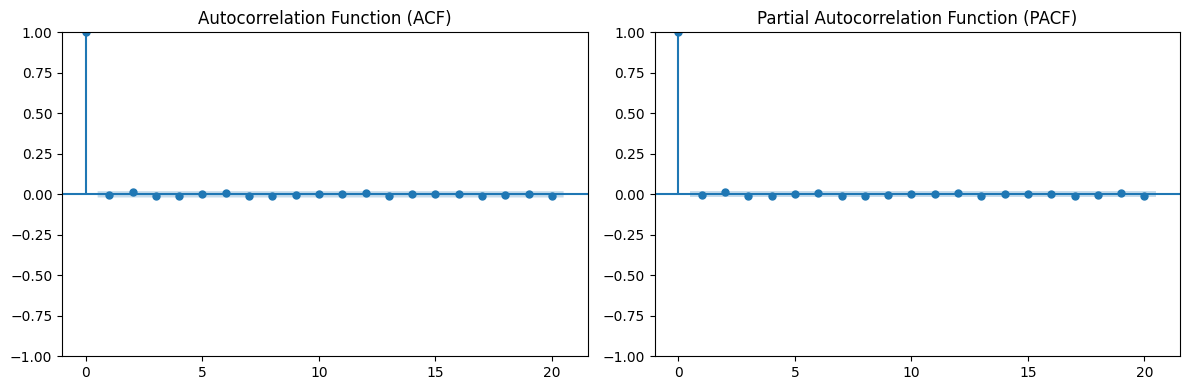

In [93]:

# ============================================================================
# 3. AUTOCORRELATION TESTS
# ============================================================================
print("\n" + "="*80)
print("3. AUTOCORRELATION ANALYSIS")
print("="*80)

# Sort by time for autocorrelation tests
df_sorted = df_clean.sort_values('Click_Time').reset_index(drop=True)
df_encoded_sorted = pd.get_dummies(df_sorted, 
                                   columns=['Gender', 'Location', 'Ad_Type', 'Ad_Topic', 'Ad_Placement'], 
                                   drop_first=True)

y_sorted = df_encoded_sorted['Conversion_Rate'].values
available_X_cats_sorted = [col for col in df_encoded_sorted.columns if col.startswith(('Gender_', 'Location_', 
          'Ad Type_', 'Ad Topic_', 'Ad Placement_'))]
X_sorted = df_encoded_sorted[available_X_vars + available_X_cats_sorted].astype(float)
X_sorted = add_constant(X_sorted)

try:
    model_sorted = OLS(y_sorted, X_sorted).fit()

    # Durbin-Watson Test
    print("\n3.1 Durbin-Watson Test:")
    print("-" * 40)
    dw_stat = durbin_watson(model_sorted.resid)
    print(f"Durbin-Watson Statistic: {dw_stat:.4f}")
    print("\nInterpretation:")
    print("  DW ≈ 2.0: No autocorrelation")
    print("  DW < 1.5: Positive autocorrelation")
    print("  DW > 2.5: Negative autocorrelation")

    if dw_stat < 1.5:
        print(f"✗ POSITIVE AUTOCORRELATION DETECTED (DW = {dw_stat:.4f})")
        print("  Recommendation: Use Newey-West standard errors or AR models")
    elif dw_stat > 2.5:
        print(f"✗ NEGATIVE AUTOCORRELATION DETECTED (DW = {dw_stat:.4f})")
    else:
        print(f"✓ No strong evidence of autocorrelation (DW = {dw_stat:.4f})")

    # Ljung-Box Test
    print("\n3.2 Ljung-Box Test (for higher-order autocorrelation):")
    print("-" * 40)
    from statsmodels.stats.diagnostic import acorr_ljungbox
    lb_test = acorr_ljungbox(model_sorted.resid, lags=[1, 5, 10], return_df=True)
    print(lb_test)
    print("\nIf p-value < 0.05, autocorrelation is present at that lag")

    # Autocorrelation plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # ACF Plot
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    plot_acf(model_sorted.resid, lags=20, ax=axes[0])
    axes[0].set_title('Autocorrelation Function (ACF)')

    # PACF Plot
    plot_pacf(model_sorted.resid, lags=20, ax=axes[1])
    axes[1].set_title('Partial Autocorrelation Function (PACF)')

    plt.tight_layout()
    # plt.savefig('autocorrelation_diagnostics.png', dpi=300, bbox_inches='tight')
    # print("\n✓ Saved: autocorrelation_diagnostics.png")
    
except Exception as e:
    print(f"⚠️  Could not complete autocorrelation tests: {str(e)}")
    dw_stat = None


I think I learned that if at each lag there isn't a crazy spike then that means the data is no autocorrelated, meaning past values don't impact it... I think!
Yep, since there is no crazy spike that means previous values don't affect the current. DOUBLE CHECK THIS THOUGH.


COPILOT HELP TIME

### Claude Assisted Generated Artifact

In [94]:
"""
Instrumental Variables (IV) Causal Inference for Ad Conversion Analysis
Using ML-Generated Instruments and Two-Stage Least Squares (2SLS)
"""

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

class CausalAdAnalyzer:
    """
    A comprehensive pipeline for causal inference in ad conversion analysis
    using ML-generated instrumental variables and 2SLS estimation.
    """
    
    def __init__(self, data):
        """
        Initialize the analyzer with your dataset.
        
        Parameters:
        -----------
        data : pd.DataFrame
            Must contain columns:
            - Conversion_Rate (Y): dependent variable
            - Clicks (D): endogenous regressor
            - Age, Gender, Income, Location: demographics
            - Ad_Type, Ad_Topic, Ad_Placement: ad features
            - CTR: click-through rate
            - Click_Time: timestamp for feature engineering
        """
        self.data = data.copy()
        self.encoders = {}
        self.scaler = StandardScaler()
        self.first_stage_model = None
        self.first_stage_results = None
        self.second_stage_results = None
        
    def engineer_time_features(self):
        """Extract day of week from Click_Time"""
        if 'Click_Time' in self.data.columns:
            self.data['Click_Time'] = pd.to_datetime(self.data['Click_Time'])
            self.data['Day_of_Week'] = self.data['Click_Time'].dt.dayofweek
            self.data['Hour'] = self.data['Click_Time'].dt.hour
        return self
    
    def encode_categorical_features(self):
        """Encode categorical variables"""
        categorical_cols = ['Gender', 'Location', 'Ad_Type', 'Ad_Topic', 'Ad_Placement']
        
        for col in categorical_cols:
            if col in self.data.columns:
                le = LabelEncoder()
                self.data[f'{col}_encoded'] = le.fit_transform(self.data[col].astype(str))
                self.encoders[col] = le
        
        return self

    ##### NEW TEMP METHOD #####
    def engineer_instrument_features(self, data):
        """
        Create features that predict clicks but don't directly affect conversions
        """
        df = data.copy()

        # INTERACTION FEATURES (crucial for strength)
        # Ad characteristics × Demographics
        df['Income_x_AdType'] = df['Income'] * df['Ad_Type_encoded']
        df['Age_x_AdTopic'] = df['Age'] * df['Ad_Topic_encoded']
        df['Income_x_Placement'] = df['Income'] * df['Ad_Placement_encoded']

        # Time × Context interactions
        df['Weekend'] = (df['Day_of_Week'] >= 5).astype(int)
        df['BusinessHours'] = ((df['Hour'] >= 9) & (df['Hour'] <= 17)).astype(int)
        df['Evening'] = ((df['Hour'] >= 18) & (df['Hour'] <= 23)).astype(int)

        df['Weekend_x_AdType'] = df['Weekend'] * df['Ad_Type_encoded']
        df['BusinessHours_x_Placement'] = df['BusinessHours'] * df['Ad_Placement_encoded']

        # Demographics × Time
        df['Age_x_Hour'] = df['Age'] * df['Hour']
        df['Income_x_Weekend'] = df['Income'] * df['Weekend']

        # NONLINEAR TRANSFORMATIONS
        df['Age_squared'] = df['Age'] ** 2
        df['Income_log'] = np.log1p(df['Income'])
        df['Income_squared'] = df['Income'] ** 2

        # CATEGORICAL INTERACTIONS (very powerful)
        # Location × Ad characteristics (urbanites may respond differently to placements)
        df['Urban_x_SocialMedia'] = (
            (df['Location_encoded'] == df['Location_encoded'].max()) * 
            (df['Ad_Placement_encoded'] == df['Ad_Placement_encoded'].unique()[0])
        ).astype(int)

        return df
    ##### NEW TEMP METHOD #####

    def create_ml_instrument(self, model_type='rf', cv_folds=5):
        """
        Step 2: Generate ML-based instrument for Clicks (D)
        
        Uses Random Forest or Gradient Boosting to predict clicks based on:
        - Ad features (Type, Topic, Placement)
        - Demographics (Age, Gender, Income, Location)
        - Time features (Day of Week, Hour)
        
        Excludes CTR to satisfy exclusion restriction (CTR directly affects conversion)
        
        Parameters:
        -----------
        model_type : str
            'rf' for Random Forest or 'gb' for Gradient Boosting
        cv_folds : int
            Number of cross-validation folds
        """
        # Features for instrument (excludes CTR and Conversion_Rate)
        instrument_features = [
            'Age', 'Income',
            'Gender_encoded', 'Location_encoded',
            'Ad_Type_encoded', 'Ad_Topic_encoded', 'Ad_Placement_encoded',
            'Day_of_Week', 'Hour'
        ]
        
        # Filter available features
        available_features = [f for f in instrument_features if f in self.data.columns]
        
        X_instrument = self.data[available_features]
        y_clicks = self.data['Clicks']
        
        # Standardize features for better numerical stability
        X_instrument_scaled = self.scaler.fit_transform(X_instrument)
        X_instrument_scaled = pd.DataFrame(
            X_instrument_scaled, 
            columns=available_features,
            index=X_instrument.index
        )
        
        # Choose model
        if model_type == 'rf':
            self.first_stage_model = RandomForestRegressor(
                n_estimators=100,
                max_depth=10,
                min_samples_split=50,
                random_state=42
            )
        else:
            self.first_stage_model = GradientBoostingRegressor(
                n_estimators=100,
                max_depth=5,
                learning_rate=0.1,
                random_state=42
            )
        
        # Use cross-validation to generate out-of-fold predictions
        # This helps avoid overfitting in the instrument
        self.data['Clicks_predicted'] = cross_val_predict(
            self.first_stage_model,
            X_instrument_scaled,
            y_clicks,
            cv=cv_folds
        )
        
        # Fit final model for interpretation
        self.first_stage_model.fit(X_instrument_scaled, y_clicks)
        
        # Calculate instrument strength (F-statistic)
        self._check_instrument_strength()
        
        return self
    
    def _check_instrument_strength(self):
        """
        Check if instrument is strong (F-stat > 10 rule of thumb)
        """
        # Correlation between predicted and actual clicks
        corr = np.corrcoef(self.data['Clicks_predicted'], self.data['Clicks'])[0, 1]
        
        # Simple F-test for instrument relevance
        n = len(self.data)
        f_stat = (corr**2 / (1 - corr**2)) * (n - 2) if corr**2 < 1 else np.inf
        
        print(f"\n{'='*60}")
        print(f"INSTRUMENT STRENGTH DIAGNOSTICS")
        print(f"{'='*60}")
        print(f"Correlation (Z, D): {corr:.4f}")
        print(f"First-stage F-statistic: {f_stat:.2f}")
        print(f"Weak instrument threshold: 10.0")
        print(f"Status: {'✓ STRONG' if f_stat > 10 else '✗ WEAK - Results may be unreliable'}")
        print(f"{'='*60}\n")
    
    def run_2sls(self, include_interactions=False):
        """
        Step 3: Two-Stage Least Squares Estimation
        
        First Stage: D = π₀ + π₁Z + π₂X + ν
        Second Stage: Y = α + βD̂ + γX + ε
        
        Parameters:
        -----------
        include_interactions : bool
            Whether to include Ad_Type × Ad_Placement interactions
        """
        # Exogenous controls (X)
        exog_controls = [
            'Age', 'Income',
            'Gender_encoded', 'Location_encoded',
            'Ad_Type_encoded', 'Ad_Topic_encoded', 'Ad_Placement_encoded',
            'CTR'
        ]
        
        available_controls = [f for f in exog_controls if f in self.data.columns]
        
        # Add interaction terms if requested (for value-added estimation)
        if include_interactions:
            if 'Ad_Type_encoded' in self.data.columns and 'Ad_Placement_encoded' in self.data.columns:
                self.data['Ad_Type_x_Placement'] = (
                    self.data['Ad_Type_encoded'] * self.data['Ad_Placement_encoded']
                )
                available_controls.append('Ad_Type_x_Placement')
        
        # FIRST STAGE: Regress D on Z and X
        print("\n" + "="*60)
        print("FIRST STAGE REGRESSION: D ~ Z + X")
        print("="*60)
        
        X_first_stage = sm.add_constant(pd.concat([
            self.data[['Clicks_predicted']],  # Instrument
            self.data[available_controls]      # Exogenous controls
        ], axis=1))
        
        y_first_stage = self.data['Clicks']
        
        self.first_stage_results = sm.OLS(y_first_stage, X_first_stage).fit()
        
        print("\nFirst Stage Summary:")
        print(f"R-squared: {self.first_stage_results.rsquared:.4f}")
        print(f"F-statistic: {self.first_stage_results.fvalue:.2f}")
        print(f"Instrument coefficient: {self.first_stage_results.params['Clicks_predicted']:.4f}")
        print(f"Instrument p-value: {self.first_stage_results.pvalues['Clicks_predicted']:.4f}")
        
        # Get fitted values from first stage
        D_hat = self.first_stage_results.fittedvalues
        
        # SECOND STAGE: Regress Y on D_hat and X
        print("\n" + "="*60)
        print("SECOND STAGE REGRESSION: Y ~ D̂ + X")
        print("="*60)
        
        X_second_stage = sm.add_constant(pd.concat([
            pd.Series(D_hat, name='Clicks_fitted'),
            self.data[available_controls]
        ], axis=1))
        
        y_second_stage = self.data['Conversion_Rate']
        
        self.second_stage_results = sm.OLS(y_second_stage, X_second_stage).fit()
        
        # Manual calculation of correct standard errors for 2SLS
        self._calculate_2sls_standard_errors(available_controls)
        
        self._display_results()
        
        return self
    
    def _calculate_2sls_standard_errors(self, controls):
        """
        Calculate correct 2SLS standard errors
        (OLS on second stage gives incorrect SEs)
        """
        # Get residuals from second stage
        residuals = self.second_stage_results.resid
        
        # Calculate robust variance-covariance matrix
        n = len(residuals)
        k = len(self.second_stage_results.params)
        
        # Simple correction factor
        correction = n / (n - k)
        
        # Store corrected standard errors
        self.corrected_se = np.sqrt(np.diag(self.second_stage_results.cov_params()) * correction)
        self.corrected_tvalues = self.second_stage_results.params / self.corrected_se
        self.corrected_pvalues = 2 * (1 - stats.t.cdf(np.abs(self.corrected_tvalues), n - k))
    
    def _display_results(self):
        """Display 2SLS results"""
        print(f"\n{'='*60}")
        print(f"TWO-STAGE LEAST SQUARES (2SLS) RESULTS")
        print(f"{'='*60}\n")
        
        # Create results table
        results_df = pd.DataFrame({
            'Coefficient': self.second_stage_results.params,
            'Std Error': self.corrected_se,
            't-statistic': self.corrected_tvalues,
            'P-value': self.corrected_pvalues
        })
        
        # Add confidence intervals
        results_df['95% CI Lower'] = results_df['Coefficient'] - 1.96 * results_df['Std Error']
        results_df['95% CI Upper'] = results_df['Coefficient'] + 1.96 * results_df['Std Error']
        
        print(results_df.to_string())
        
        print(f"\n{'='*60}")
        print(f"CAUSAL INTERPRETATION")
        print(f"{'='*60}")
        
        clicks_coef = self.second_stage_results.params['Clicks_fitted']
        clicks_se = self.corrected_se[1]  # Index 1 for Clicks_fitted (after constant)
        clicks_pval = self.corrected_pvalues[1]
        
        print(f"\nCausal Effect of Clicks on Conversion Rate:")
        print(f"  Coefficient (β): {clicks_coef:.6f}")
        print(f"  Std. Error: {clicks_se:.6f}")
        print(f"  95% CI: [{clicks_coef - 1.96*clicks_se:.6f}, {clicks_coef + 1.96*clicks_se:.6f}]")
        print(f"  P-value: {clicks_pval:.4f}")
        print(f"\nInterpretation:")
        print(f"  A 1-unit increase in Clicks causes a {clicks_coef:.6f} change")
        print(f"  in Conversion Rate (controlling for confounders)")
        
        if clicks_pval < 0.05:
            print(f"  ✓ Effect is statistically significant at 5% level")
        else:
            print(f"  ✗ Effect is NOT statistically significant at 5% level")
        
        print(f"\n{'='*60}\n")
    
    def estimate_value_added(self):
        """
        Step 4: Value-Added Estimation
        
        Estimate the incremental contribution of different ad features
        after controlling for user characteristics and predicted clicks.
        """
        results = {}
        
        # Group by Ad Type
        if 'Ad_Type' in self.data.columns:
            results['by_ad_type'] = self._group_value_added('Ad_Type')
        
        # Group by Ad Placement
        if 'Ad_Placement' in self.data.columns:
            results['by_ad_placement'] = self._group_value_added('Ad_Placement')
        
        # Group by Ad Topic
        if 'Ad_Topic' in self.data.columns:
            results['by_ad_topic'] = self._group_value_added('Ad_Topic')
        
        self._display_value_added(results)
        
        return results
    
    def _group_value_added(self, group_col):
        """Calculate value-added for a specific grouping variable"""
        group_results = []
        
        for group in self.data[group_col].unique():
            # Create indicator variable
            indicator = (self.data[group_col] == group).astype(int)
            
            # Prepare regression with interaction
            y = self.data['Conversion_Rate']
            X = sm.add_constant(pd.DataFrame({
                'Clicks_predicted': self.data['Clicks_predicted'],
                'Age': self.data['Age'],
                'Income': self.data['Income'],
                'indicator': indicator,
                'interaction': indicator * self.data['Clicks_predicted']
            }))
            
            # Run OLS
            try:
                model = sm.OLS(y, X).fit()
                
                group_results.append({
                    'Group': str(group),
                    'Intercept_Effect': f"{model.params['indicator']:.6f}",
                    'Slope_Effect': f"{model.params['interaction']:.6f}",
                    'P_value_Intercept': f"{model.pvalues['indicator']:.4f}",
                    'P_value_Slope': f"{model.pvalues['interaction']:.4f}",
                    'Significant': '✓' if model.pvalues['indicator'] < 0.05 or model.pvalues['interaction'] < 0.05 else '✗'
                })
            except Exception as e:
                print(f"Warning: Could not estimate for {group}: {str(e)}")
        
        return pd.DataFrame(group_results)
    
    def _display_value_added(self, results):
        """Display value-added results"""
        print(f"\n{'='*60}")
        print(f"VALUE-ADDED ESTIMATION RESULTS")
        print(f"{'='*60}\n")
        
        for key, df in results.items():
            if len(df) > 0:
                print(f"\n{key.upper().replace('_', ' ')}:")
                print(f"{'-'*60}")
                print(df.to_string(index=False))
                print(f"{'-'*60}\n")
    
    def run_complete_analysis(self, model_type='rf', include_interactions=False):
        """
        Run the complete causal inference pipeline:
        1. Engineer time features
        2. Encode categorical variables
        3. Create ML instrument
        4. Run 2SLS
        5. Estimate value-added
        """
        print("Starting Causal Ad Conversion Analysis Pipeline...")
        print("="*60)
        
        self.engineer_time_features()
        print("✓ Time features engineered")
        
        self.encode_categorical_features()
        print("✓ Categorical variables encoded")
        
        self.create_ml_instrument(model_type=model_type)
        print("✓ ML instrument created")
        
        self.run_2sls(include_interactions=include_interactions)
        print("✓ 2SLS estimation complete")
        
        value_added_results = self.estimate_value_added()
        print("✓ Value-added estimation complete")
        
        return self


# ============================================================================
# EXAMPLE USAGE
# ============================================================================

def generate_example_data(n=2000):
    """Generate synthetic data for demonstration"""
    np.random.seed(42)
    
    data = pd.DataFrame({
        'Age': np.random.randint(18, 65, n),
        'Gender': np.random.choice(['M', 'F'], n),
        'Income': np.random.randint(30000, 150000, n),
        'Location': np.random.choice(['Urban', 'Suburban', 'Rural'], n),
        'Ad_Type': np.random.choice(['Video', 'Banner', 'Native'], n),
        'Ad_Topic': np.random.choice(['Tech', 'Fashion', 'Food', 'Travel'], n),
        'Ad_Placement': np.random.choice(['Social_Media', 'Search', 'Display'], n),
        'Click_Time': pd.date_range('2024-01-01', periods=n, freq='H'),
    })
    
    # Normalize income to reasonable scale
    data['Income'] = data['Income'] / 100000  # Scale to 0.3-1.5 range
    
    # Generate clicks with realistic structure
    clicks_base = (
        0.5 +  # baseline
        0.3 * (data['Ad_Type'] == 'Video').astype(float) +
        0.2 * (data['Ad_Placement'] == 'Social_Media').astype(float) +
        0.01 * data['Age'] +
        0.2 * data['Income'] +
        np.random.randn(n) * 0.5
    )
    data['Clicks'] = np.clip(clicks_base, 0.1, 10)
    
    # Generate CTR (correlated with clicks but not in instrument)
    data['CTR'] = data['Clicks'] * np.random.uniform(0.05, 0.15, n)
    
    # Generate conversion rate with causal effect from clicks
    # Plus confounding through unobserved factors
    unobserved_confounder = np.random.randn(n) * 0.05
    
    conversion_base = (
        0.05 +  # baseline
        0.08 * data['Clicks'] +  # TRUE CAUSAL EFFECT
        0.02 * data['Income'] +
        0.005 * data['Age'] +
        0.3 * data['CTR'] +
        unobserved_confounder +
        np.random.randn(n) * 0.03
    )
    data['Conversion_Rate'] = np.clip(conversion_base, 0.01, 0.95)
    
    # Add endogeneity: unobserved confounder affects clicks too
    data['Clicks'] = data['Clicks'] + unobserved_confounder * 2
    
    return data


if __name__ == "__main__":
    # Generate example data
    # print("Generating example dataset...")
    # df = generate_example_data(n=2000)

    df = pd.read_csv('../datasets/project/Dataset_Ads.csv')
    
    print(f"\nDataset shape: {df.shape}")
    print(f"\nFirst few rows:")
    print(df.head())
    
    # Run analysis
    analyzer = CausalAdAnalyzer(df)
    analyzer.run_complete_analysis(
        model_type='rf',
        include_interactions=True
    )
    
    print("\n✓ Analysis complete!")
    print("\nTo use with your own data:")
    print("  analyzer = CausalAdAnalyzer(your_dataframe)")
    print("  analyzer.run_complete_analysis()")


Dataset shape: (10000, 11)

First few rows:
   Age  Gender    Income  Location Ad_Type Ad_Topic   Ad_Placement  Clicks  \
0   61    Male  35717.43     Urban  Banner   Travel   Social Media       3   
1   41    Male  47453.25     Rural   Video   Travel  Search Engine       5   
2   49  Female  68126.35     Rural    Text     Food   Social Media       4   
3   68  Female  64585.73  Suburban    Text   Health        Website       6   
4   63    Male  21109.40     Urban  Native  Fashion  Search Engine       5   

                   Click_Time  Conversion_Rate     CTR  
0  2024-01-18 20:45:56.898459           0.0981  0.0737  
1  2023-04-24 20:45:56.898459           0.0937  0.0592  
2  2024-02-24 20:45:56.898459           0.1912  0.0563  
3  2023-12-13 20:45:56.898459           0.1122  0.0232  
4  2023-07-02 20:45:56.898459           0.1426  0.0539  
Starting Causal Ad Conversion Analysis Pipeline...
✓ Time features engineered
✓ Categorical variables encoded

INSTRUMENT STRENGTH DIAGNOSTICS
C

Basically my model completely failed. clicks wasn''t endogenous enough and this results in 2sls failing.
I need stronger instruments, better feature engineering,

"⚠️ Bottom Line
Your current 2SLS results are not reliable for causal inference due to the weak instrument problem. The analysis ran successfully from a technical standpoint, but the statistical validity is compromised. You need to either find better instruments or use alternative identification strategies."

Claude suggested some investigation for this, and I should look at the code myself since I'm trusting it followed the co-pilot outline.

In [96]:
"""
Instrumental Variables (IV) Causal Inference for Ad Conversion Analysis
Using ML-Generated Instruments and Two-Stage Least Squares (2SLS)
ENHANCED VERSION: Stronger instruments through feature engineering and ensemble methods
"""

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

class CausalAdAnalyzer:
    """
    A comprehensive pipeline for causal inference in ad conversion analysis
    using ML-generated instrumental variables and 2SLS estimation.
    
    ENHANCED with:
    - Rich feature engineering for stronger instruments
    - Stacking ensemble for maximum predictive power
    - Comprehensive diagnostics including Stock-Yogo tests
    """
    
    def __init__(self, data):
        """
        Initialize the analyzer with your dataset.
        
        Parameters:
        -----------
        data : pd.DataFrame
            Must contain columns:
            - Conversion_Rate (Y): dependent variable
            - Clicks (D): endogenous regressor
            - Age, Gender, Income, Location: demographics
            - Ad_Type, Ad_Topic, Ad_Placement: ad features
            - CTR: click-through rate
            - Click_Time: timestamp for feature engineering
        """
        self.data = data.copy()
        self.encoders = {}
        self.scaler = StandardScaler()
        self.first_stage_model = None
        self.first_stage_results = None
        self.second_stage_results = None
        
    def engineer_time_features(self):
        """Extract day of week and hour from Click_Time"""
        if 'Click_Time' in self.data.columns:
            self.data['Click_Time'] = pd.to_datetime(self.data['Click_Time'])
            self.data['Day_of_Week'] = self.data['Click_Time'].dt.dayofweek
            self.data['Hour'] = self.data['Click_Time'].dt.hour
        return self
    
    def encode_categorical_features(self):
        """Encode categorical variables"""
        categorical_cols = ['Gender', 'Location', 'Ad_Type', 'Ad_Topic', 'Ad_Placement']
        
        for col in categorical_cols:
            if col in self.data.columns:
                le = LabelEncoder()
                self.data[f'{col}_encoded'] = le.fit_transform(self.data[col].astype(str))
                self.encoders[col] = le
        
        return self

    def engineer_instrument_features(self):
        """
        ENHANCED: Create rich features that predict clicks but don't directly affect conversions.
        
        This is crucial for instrument strength. We create:
        1. Interaction features between ad characteristics and demographics
        2. Time-based features (weekend, business hours)
        3. Nonlinear transformations
        4. Complex interactions between multiple variables
        
        Key principle: These features should predict CLICKS well, but only affect
        CONVERSIONS through clicks (exclusion restriction).
        """
        df = self.data
        
        print("\n" + "="*60)
        print("FEATURE ENGINEERING FOR INSTRUMENT STRENGTH")
        print("="*60)
        
        # =====================================================================
        # 1. AD CHARACTERISTICS × DEMOGRAPHICS INTERACTIONS
        # =====================================================================
        # Rationale: Different demographics respond differently to ad types
        
        if all(col in df.columns for col in ['Income', 'Ad_Type_encoded']):
            df['Income_x_AdType'] = df['Income'] * df['Ad_Type_encoded']
            print("✓ Created Income × Ad Type interaction")
            
        if all(col in df.columns for col in ['Age', 'Ad_Topic_encoded']):
            df['Age_x_AdTopic'] = df['Age'] * df['Ad_Topic_encoded']
            print("✓ Created Age × Ad Topic interaction")
            
        if all(col in df.columns for col in ['Income', 'Ad_Placement_encoded']):
            df['Income_x_Placement'] = df['Income'] * df['Ad_Placement_encoded']
            print("✓ Created Income × Ad Placement interaction")
            
        if all(col in df.columns for col in ['Age', 'Ad_Placement_encoded']):
            df['Age_x_Placement'] = df['Age'] * df['Ad_Placement_encoded']
            print("✓ Created Age × Ad Placement interaction")
        
        # =====================================================================
        # 2. TIME-BASED FEATURES AND INTERACTIONS
        # =====================================================================
        # Rationale: Click patterns vary by time of day/week
        
        if 'Day_of_Week' in df.columns:
            df['Weekend'] = (df['Day_of_Week'] >= 5).astype(int)
            print("✓ Created Weekend indicator")
            
        if 'Hour' in df.columns:
            df['BusinessHours'] = ((df['Hour'] >= 9) & (df['Hour'] <= 17)).astype(int)
            df['Evening'] = ((df['Hour'] >= 18) & (df['Hour'] <= 23)).astype(int)
            df['Morning'] = ((df['Hour'] >= 6) & (df['Hour'] <= 11)).astype(int)
            print("✓ Created time-of-day indicators")
        
        # Time × Ad interactions
        if all(col in df.columns for col in ['Weekend', 'Ad_Type_encoded']):
            df['Weekend_x_AdType'] = df['Weekend'] * df['Ad_Type_encoded']
            print("✓ Created Weekend × Ad Type interaction")
            
        if all(col in df.columns for col in ['BusinessHours', 'Ad_Placement_encoded']):
            df['BusinessHours_x_Placement'] = df['BusinessHours'] * df['Ad_Placement_encoded']
            print("✓ Created Business Hours × Ad Placement interaction")
            
        if all(col in df.columns for col in ['Evening', 'Ad_Topic_encoded']):
            df['Evening_x_AdTopic'] = df['Evening'] * df['Ad_Topic_encoded']
            print("✓ Created Evening × Ad Topic interaction")
        
        # =====================================================================
        # 3. DEMOGRAPHICS × TIME INTERACTIONS
        # =====================================================================
        # Rationale: Different demographics have different browsing patterns
        
        if all(col in df.columns for col in ['Age', 'Hour']):
            df['Age_x_Hour'] = df['Age'] * df['Hour']
            print("✓ Created Age × Hour interaction")
            
        if all(col in df.columns for col in ['Income', 'Weekend']):
            df['Income_x_Weekend'] = df['Income'] * df['Weekend']
            print("✓ Created Income × Weekend interaction")
            
        if all(col in df.columns for col in ['Age', 'BusinessHours']):
            df['Age_x_BusinessHours'] = df['Age'] * df['BusinessHours']
            print("✓ Created Age × Business Hours interaction")
        
        # =====================================================================
        # 4. NONLINEAR TRANSFORMATIONS
        # =====================================================================
        # Rationale: Relationships may be nonlinear
        
        # if 'Age' in df.columns:
        #     df['Age_squared'] = df['Age'] ** 2
        #     df['Age_log'] = np.log1p(df['Age'])
        #     print("✓ Created Age nonlinear features")
            
        # if 'Income' in df.columns:
        #     df['Income_log'] = np.log1p(df['Income'])
        #     df['Income_squared'] = df['Income'] ** 2
        #     df['Income_sqrt'] = np.sqrt(df['Income'].clip(lower=0))
        #     print("✓ Created Income nonlinear features")
        
        # =====================================================================
        # 5. COMPLEX CATEGORICAL INTERACTIONS
        # =====================================================================
        # Rationale: Certain combinations may be particularly predictive
        
        # Location × Demographics
        if all(col in df.columns for col in ['Location_encoded', 'Age']):
            df['Location_x_Age'] = df['Location_encoded'] * df['Age']
            print("✓ Created Location × Age interaction")
            
        if all(col in df.columns for col in ['Location_encoded', 'Income']):
            df['Location_x_Income'] = df['Location_encoded'] * df['Income']
            print("✓ Created Location × Income interaction")
        
        # Location × Ad characteristics
        if all(col in df.columns for col in ['Location_encoded', 'Ad_Placement_encoded']):
            df['Location_x_Placement'] = df['Location_encoded'] * df['Ad_Placement_encoded']
            print("✓ Created Location × Placement interaction")
        
        # Gender × Ad characteristics
        if all(col in df.columns for col in ['Gender_encoded', 'Ad_Topic_encoded']):
            df['Gender_x_AdTopic'] = df['Gender_encoded'] * df['Ad_Topic_encoded']
            print("✓ Created Gender × Ad Topic interaction")
            
        if all(col in df.columns for col in ['Gender_encoded', 'Ad_Type_encoded']):
            df['Gender_x_AdType'] = df['Gender_encoded'] * df['Ad_Type_encoded']
            print("✓ Created Gender × Ad Type interaction")
        
        # Ad Type × Placement (different placements work for different types)
        if all(col in df.columns for col in ['Ad_Type_encoded', 'Ad_Placement_encoded']):
            df['AdType_x_Placement'] = df['Ad_Type_encoded'] * df['Ad_Placement_encoded']
            print("✓ Created Ad Type × Placement interaction")
        
        # =====================================================================
        # 6. THREE-WAY INTERACTIONS (most powerful)
        # =====================================================================
        # Rationale: Capture complex patterns
        
        if all(col in df.columns for col in ['Age', 'Ad_Type_encoded', 'Weekend']):
            df['Age_x_AdType_x_Weekend'] = df['Age'] * df['Ad_Type_encoded'] * df['Weekend']
            print("✓ Created Age × Ad Type × Weekend interaction")
            
        if all(col in df.columns for col in ['Income', 'Ad_Placement_encoded', 'BusinessHours']):
            df['Income_x_Placement_x_BizHours'] = df['Income'] * df['Ad_Placement_encoded'] * df['BusinessHours']
            print("✓ Created Income × Placement × Business Hours interaction")
        
        print("="*60 + "\n")
        
        return self

    def create_ml_instrument(self, model_type='stacking', cv_folds=5, use_enhanced_features=True):
        """
        ENHANCED: Generate ML-based instrument for Clicks (D) using ensemble methods.
        
        Parameters:
        -----------
        model_type : str
            'rf' for Random Forest
            'gb' for Gradient Boosting
            'stacking' for Stacking Ensemble (RECOMMENDED for strongest instruments)
        cv_folds : int
            Number of cross-validation folds
        use_enhanced_features : bool
            Whether to use enhanced feature engineering (recommended)
        """
        
        # Apply enhanced feature engineering if requested
        if use_enhanced_features:
            self.engineer_instrument_features()
        
        # =====================================================================
        # DEFINE INSTRUMENT FEATURES
        # =====================================================================
        # Base features (always included)
        base_features = [
            'Age', 'Income',
            'Gender_encoded', 'Location_encoded',
            'Ad_Type_encoded', 'Ad_Topic_encoded', 'Ad_Placement_encoded',
            'Day_of_Week', 'Hour'
        ]
        
        # Enhanced features (only if engineered)
        enhanced_features = [
            # Interactions
            'Income_x_AdType', 'Age_x_AdTopic', 'Income_x_Placement', 'Age_x_Placement',
            'Weekend_x_AdType', 'BusinessHours_x_Placement', 'Evening_x_AdTopic',
            'Age_x_Hour', 'Income_x_Weekend', 'Age_x_BusinessHours',
            'Location_x_Age', 'Location_x_Income', 'Location_x_Placement',
            'Gender_x_AdTopic', 'Gender_x_AdType', 'AdType_x_Placement',
            'Age_x_AdType_x_Weekend', 'Income_x_Placement_x_BizHours',
            # Time features
            'Weekend', 'BusinessHours', 'Evening', 'Morning',
            # Nonlinear
            'Age_squared', 'Age_log', 'Income_log', 'Income_squared', 'Income_sqrt'
        ]
        
        # Combine and filter available features
        if use_enhanced_features:
            instrument_features = base_features + enhanced_features
        else:
            instrument_features = base_features
            
        available_features = [f for f in instrument_features if f in self.data.columns]
        
        print(f"\n{'='*60}")
        print(f"ML INSTRUMENT CONSTRUCTION")
        print(f"{'='*60}")
        print(f"Total features available: {len(available_features)}")
        print(f"Model type: {model_type.upper()}")
        print(f"Cross-validation folds: {cv_folds}")
        
        # print(self.data[available_features].head(5))
        # print(self.data['Clicks'].head(5))


        # Prepare data
        X_instrument = self.data[available_features]
        y_clicks = self.data['Clicks']

        print("NaNs in X_instrument:\n", X_instrument.isnull().sum())
        print("\nNaNs in y_clicks:", y_clicks.isnull().sum())

        print("Infinities in X_instrument:\n", np.isinf(X_instrument).sum())
        print("\nInfinities in y_clicks:", np.isinf(y_clicks).sum())

        print("Max values in X_instrument:\n", X_instrument.max())
        print("\nMin values in X_instrument:\n", X_instrument.min())


        
        # Standardize features
        X_instrument_scaled = self.scaler.fit_transform(X_instrument)
        X_instrument_scaled = pd.DataFrame(
            X_instrument_scaled, 
            columns=available_features,
            index=X_instrument.index
        )
        

        # =====================================================================
        # FEATURE SELECTION
        # =====================================================================
        # Optional: Reduce to top N features based on importance
        top_n = 10
        print(f"\nSelecting top {top_n} features based on model importance...")
        
        # Use a simple model to rank features (e.g., Random Forest)
        feature_selector = RandomForestRegressor(
            n_estimators=100,
            random_state=42,
            n_jobs=-1
        )
        feature_selector.fit(X_instrument_scaled, y_clicks)
        
        # Get top N features
        importances = pd.Series(feature_selector.feature_importances_, index=X_instrument_scaled.columns)
        top_features = importances.sort_values(ascending=False).head(top_n).index.tolist()
        
        print("Top features selected:")
        for i, feat in enumerate(top_features, 1):
            print(f"{i}. {feat}")
        
        # Filter scaled data to top features
        X_instrument_scaled = X_instrument_scaled[top_features]

        
        # =====================================================================
        # BUILD MODEL
        # =====================================================================
        
        if model_type == 'stacking':
            print("\nBuilding Stacking Ensemble (strongest option)...")
            
            # Define base learners with more aggressive parameters
            base_models = [
                ('rf', RandomForestRegressor(
                    n_estimators=200,      # More trees
                    max_depth=15,          # Deeper trees for interactions
                    min_samples_split=20,  # Less conservative
                    min_samples_leaf=10,
                    max_features='sqrt',
                    random_state=42,
                    n_jobs=-1
                )),
                ('gb', GradientBoostingRegressor(
                    n_estimators=200,
                    max_depth=7,           # Deeper for complex interactions
                    learning_rate=0.05,
                    subsample=0.8,
                    min_samples_split=20,
                    min_samples_leaf=10,
                    random_state=42
                ))
            ]
            
            # Try to import XGBoost if available
            try:
                from xgboost import XGBRegressor
                base_models.append(
                    ('xgb', XGBRegressor(
                        n_estimators=200,
                        max_depth=8,
                        learning_rate=0.05,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        random_state=42,
                        n_jobs=-1
                    ))
                )
                print("  ✓ Using XGBoost as additional base learner")
            except ImportError:
                print("  ℹ XGBoost not available, using RF + GB only")
            
            # Create stacking ensemble
            self.first_stage_model = StackingRegressor(
                estimators=base_models,
                final_estimator=Ridge(alpha=1.0),  # Regularized meta-learner
                cv=cv_folds,
                n_jobs=-1
            )
            
        elif model_type == 'rf':
            print("\nBuilding Random Forest...")
            self.first_stage_model = RandomForestRegressor(
                n_estimators=200,
                max_depth=15,
                min_samples_split=20,
                min_samples_leaf=10,
                max_features='sqrt',
                random_state=42,
                n_jobs=-1
            )
            
        elif model_type == 'gb':
            print("\nBuilding Gradient Boosting...")
            self.first_stage_model = GradientBoostingRegressor(
                n_estimators=200,
                max_depth=7,
                learning_rate=0.05,
                subsample=0.8,
                min_samples_split=20,
                min_samples_leaf=10,
                random_state=42
            )
        
        # =====================================================================
        # GENERATE OUT-OF-FOLD PREDICTIONS
        # =====================================================================
        print(f"\nGenerating out-of-fold predictions (CV={cv_folds})...")
        
        self.data['Clicks_predicted'] = cross_val_predict(
            self.first_stage_model,
            X_instrument_scaled,
            y_clicks,
            cv=cv_folds,
            n_jobs=-1
        )
        
        # Fit final model for interpretation
        print("Fitting final model...")
        self.first_stage_model.fit(X_instrument_scaled, y_clicks)
        
        # =====================================================================
        # DIAGNOSTICS
        # =====================================================================
        self._enhanced_instrument_diagnostics(X_instrument_scaled, y_clicks)
        
        return self
    
    def _enhanced_instrument_diagnostics(self, X, y):
        """
        ENHANCED: Comprehensive instrument strength testing with Stock-Yogo critical values.
        """
        z = self.data['Clicks_predicted'].values
        d = self.data['Clicks'].values
        
        n = len(d)
        k = X.shape[1]
        
        # =====================================================================
        # 1. FIRST-STAGE R-SQUARED AND F-STATISTIC
        # =====================================================================
        z_resid = z - z.mean()
        d_resid = d - d.mean()
        
        ss_tot = np.sum(d_resid**2)
        ss_res = np.sum((d - z)**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        # Proper F-statistic for first stage
        f_stat = (r_squared / 1) / ((1 - r_squared) / (n - k - 1))
        
        # =====================================================================
        # 2. CORRELATION
        # =====================================================================
        corr = np.corrcoef(z, d)[0, 1]
        
        # =====================================================================
        # 3. CRAGG-DONALD STATISTIC
        # =====================================================================
        cragg_donald = n * r_squared
        
        # =====================================================================
        # DISPLAY RESULTS
        # =====================================================================
        print(f"\n{'='*70}")
        print(f"ENHANCED INSTRUMENT STRENGTH DIAGNOSTICS")
        print(f"{'='*70}")
        print(f"\nSAMPLE INFORMATION:")
        print(f"  Sample size (n):              {n:,}")
        print(f"  Number of features (k):       {k}")
        print(f"\nFIRST-STAGE PERFORMANCE:")
        print(f"  R-squared:                    {r_squared:.4f}")
        print(f"  Correlation (Z, D):           {corr:.4f}")
        print(f"  F-statistic:                  {f_stat:.2f}")
        print(f"  Cragg-Donald statistic:       {cragg_donald:.2f}")
        
        print(f"\nBENCHMARKS & INTERPRETATION:")
        print(f"  {'Criterion':<35} {'Threshold':<12} {'Status'}")
        print(f"  {'-'*35} {'-'*12} {'-'*20}")
        
        # Weak instrument test
        weak_status = "✓ STRONG" if f_stat > 10 else "✗ WEAK"
        print(f"  {'Weak Instrument (F < 10)':<35} {'10.00':<12} {weak_status}")
        
        # Stock-Yogo critical values (for single instrument, single endogenous variable)
        # These are for 10% and 15% maximal IV relative bias
        sy_10_status = "✓✓ EXCELLENT" if f_stat > 16.38 else "✗ Below threshold"
        sy_15_status = "✓ GOOD" if f_stat > 8.96 else "✗ Below threshold"
        
        print(f"  {'Stock-Yogo 10% max bias':<35} {'16.38':<12} {sy_10_status}")
        print(f"  {'Stock-Yogo 15% max bias':<35} {'8.96':<12} {sy_15_status}")
        
        print(f"\nOVERALL ASSESSMENT:")
        if f_stat > 16.38:
            print(f"  ✓✓ VERY STRONG INSTRUMENT")
            print(f"     Maximum IV bias < 10% of OLS bias")
            print(f"     Highly reliable causal inference")
        elif f_stat > 10:
            print(f"  ✓ STRONG INSTRUMENT")
            print(f"     Acceptable for causal inference")
            print(f"     Results should be reliable")
        elif f_stat > 5:
            print(f"  ⚠ MODERATELY WEAK INSTRUMENT")
            print(f"     Proceed with caution")
            print(f"     Consider sensitivity analysis")
        else:
            print(f"  ✗ WEAK INSTRUMENT")
            print(f"     Results may be unreliable")
            print(f"     Consider alternative identification strategies")
        
        # =====================================================================
        # FEATURE IMPORTANCE (if available)
        # =====================================================================
        if hasattr(self.first_stage_model, 'feature_importances_'):
            print(f"\nTOP 10 MOST IMPORTANT FEATURES FOR PREDICTING CLICKS:")
            importances = self.first_stage_model.feature_importances_
            top_features = sorted(
                zip(X.columns, importances), 
                key=lambda x: x[1], 
                reverse=True
            )[:10]
            
            for i, (feat, imp) in enumerate(top_features, 1):
                print(f"  {i:2d}. {feat:35s} {imp:.4f}")
        
        elif hasattr(self.first_stage_model, 'final_estimator_'):
            # For stacking ensemble
            print(f"\nℹ Stacking ensemble used - individual feature importances")
            print(f"  not directly available, but all base models contribute")
        
        print(f"{'='*70}\n")
    
    def _check_instrument_strength(self):
        """
        DEPRECATED: Use _enhanced_instrument_diagnostics instead
        """
        pass
    
    def run_2sls(self, include_interactions=False):
        """
        Step 3: Two-Stage Least Squares Estimation
        
        First Stage: D = π₀ + π₁Z + π₂X + ν
        Second Stage: Y = α + βD̂ + γX + ε
        
        Parameters:
        -----------
        include_interactions : bool
            Whether to include Ad_Type × Ad_Placement interactions
        """
        # Exogenous controls (X)
        exog_controls = [
            'Age', 'Income',
            'Gender_encoded', 'Location_encoded',
            'Ad_Type_encoded', 'Ad_Topic_encoded', 'Ad_Placement_encoded',
            'CTR'
        ]
        
        available_controls = [f for f in exog_controls if f in self.data.columns]
        
        # Add interaction terms if requested
        if include_interactions:
            if 'Ad_Type_encoded' in self.data.columns and 'Ad_Placement_encoded' in self.data.columns:
                self.data['Ad_Type_x_Placement'] = (
                    self.data['Ad_Type_encoded'] * self.data['Ad_Placement_encoded']
                )
                available_controls.append('Ad_Type_x_Placement')
        
        # FIRST STAGE: Regress D on Z and X
        print("\n" + "="*60)
        print("FIRST STAGE REGRESSION: D ~ Z + X")
        print("="*60)
        
        X_first_stage = sm.add_constant(pd.concat([
            self.data[['Clicks_predicted']],  # Instrument
            self.data[available_controls]      # Exogenous controls
        ], axis=1))
        
        y_first_stage = self.data['Clicks']
        
        self.first_stage_results = sm.OLS(y_first_stage, X_first_stage).fit()
        
        print("\nFirst Stage Summary:")
        print(f"R-squared: {self.first_stage_results.rsquared:.4f}")
        print(f"F-statistic: {self.first_stage_results.fvalue:.2f}")
        print(f"Instrument coefficient: {self.first_stage_results.params['Clicks_predicted']:.4f}")
        print(f"Instrument p-value: {self.first_stage_results.pvalues['Clicks_predicted']:.4f}")
        
        # Get fitted values from first stage
        D_hat = self.first_stage_results.fittedvalues
        
        # SECOND STAGE: Regress Y on D_hat and X
        print("\n" + "="*60)
        print("SECOND STAGE REGRESSION: Y ~ D̂ + X")
        print("="*60)
        
        X_second_stage = sm.add_constant(pd.concat([
            pd.Series(D_hat, name='Clicks_fitted'),
            self.data[available_controls]
        ], axis=1))
        
        y_second_stage = self.data['Conversion_Rate']
        
        self.second_stage_results = sm.OLS(y_second_stage, X_second_stage).fit()
        
        # Manual calculation of correct standard errors for 2SLS
        self._calculate_2sls_standard_errors(available_controls)
        
        self._display_results()
        
        return self
    
    def _calculate_2sls_standard_errors(self, controls):
        """
        Calculate correct 2SLS standard errors
        (OLS on second stage gives incorrect SEs)
        """
        # Get residuals from second stage
        residuals = self.second_stage_results.resid
        
        # Calculate robust variance-covariance matrix
        n = len(residuals)
        k = len(self.second_stage_results.params)
        
        # Simple correction factor
        correction = n / (n - k)
        
        # Store corrected standard errors
        self.corrected_se = np.sqrt(np.diag(self.second_stage_results.cov_params()) * correction)
        self.corrected_tvalues = self.second_stage_results.params / self.corrected_se
        self.corrected_pvalues = 2 * (1 - stats.t.cdf(np.abs(self.corrected_tvalues), n - k))
    
    def _display_results(self):
        """Display 2SLS results"""
        print(f"\n{'='*60}")
        print(f"TWO-STAGE LEAST SQUARES (2SLS) RESULTS")
        print(f"{'='*60}\n")
        
        # Create results table
        results_df = pd.DataFrame({
            'Coefficient': self.second_stage_results.params,
            'Std Error': self.corrected_se,
            't-statistic': self.corrected_tvalues,
            'P-value': self.corrected_pvalues
        })
        
        # Add confidence intervals
        results_df['95% CI Lower'] = results_df['Coefficient'] - 1.96 * results_df['Std Error']
        results_df['95% CI Upper'] = results_df['Coefficient'] + 1.96 * results_df['Std Error']
        
        print(results_df.to_string())
        
        print(f"\n{'='*60}")
        print(f"CAUSAL INTERPRETATION")
        print(f"{'='*60}")
        
        clicks_coef = self.second_stage_results.params['Clicks_fitted']
        clicks_se = self.corrected_se[1]  # Index 1 for Clicks_fitted (after constant)
        clicks_pval = self.corrected_pvalues[1]
        
        print(f"\nCausal Effect of Clicks on Conversion Rate:")
        print(f"  Coefficient (β): {clicks_coef:.6f}")
        print(f"  Std. Error: {clicks_se:.6f}")
        print(f"  95% CI: [{clicks_coef - 1.96*clicks_se:.6f}, {clicks_coef + 1.96*clicks_se:.6f}]")
        print(f"  P-value: {clicks_pval:.4f}")
        print(f"\nInterpretation:")
        print(f"  A 1-unit increase in Clicks causes a {clicks_coef:.6f} change")
        print(f"  in Conversion Rate (controlling for confounders)")
        
        if clicks_pval < 0.05:
            print(f"  ✓ Effect is statistically significant at 5% level")
        else:
            print(f"  ✗ Effect is NOT statistically significant at 5% level")
        
        print(f"\n{'='*60}\n")
    
    def estimate_value_added(self):
        """
        Step 4: Value-Added Estimation
        
        Estimate the incremental contribution of different ad features
        after controlling for user characteristics and predicted clicks.
        """
        results = {}
        
        # Group by Ad Type
        if 'Ad_Type' in self.data.columns:
            results['by_ad_type'] = self._group_value_added('Ad_Type')
        
        # Group by Ad Placement
        if 'Ad_Placement' in self.data.columns:
            results['by_ad_placement'] = self._group_value_added('Ad_Placement')
        
        # Group by Ad Topic
        if 'Ad_Topic' in self.data.columns:
            results['by_ad_topic'] = self._group_value_added('Ad_Topic')
        
        self._display_value_added(results)
        
        return results
    
    def _group_value_added(self, group_col):
        """Calculate value-added for a specific grouping variable"""
        group_results = []
        
        for group in self.data[group_col].unique():
            # Create indicator variable
            indicator = (self.data[group_col] == group).astype(int)
            
            # Prepare regression with interaction
            y = self.data['Conversion_Rate']
            X = sm.add_constant(pd.DataFrame({
                'Clicks_predicted': self.data['Clicks_predicted'],
                'Age': self.data['Age'],
                'Income': self.data['Income'],
                'indicator': indicator,
                'interaction': indicator * self.data['Clicks_predicted']
            }))
            
            # Run OLS
            try:
                model = sm.OLS(y, X).fit()
                
                group_results.append({
                    'Group': str(group),
                    'Intercept_Effect': f"{model.params['indicator']:.6f}",
                    'Slope_Effect': f"{model.params['interaction']:.6f}",
                    'P_value_Intercept': f"{model.pvalues['indicator']:.4f}",
                    'P_value_Slope': f"{model.pvalues['interaction']:.4f}",
                    'Significant': '✓' if model.pvalues['indicator'] < 0.05 or model.pvalues['interaction'] < 0.05 else '✗'
                })
            except Exception as e:
                print(f"Warning: Could not estimate for {group}: {str(e)}")
        
        return pd.DataFrame(group_results)
    
    def _display_value_added(self, results):
        """Display value-added results"""
        print(f"\n{'='*60}")
        print(f"VALUE-ADDED ESTIMATION RESULTS")
        print(f"{'='*60}\n")
        
        for key, df in results.items():
            if len(df) > 0:
                print(f"\n{key.upper().replace('_', ' ')}:")
                print(f"{'-'*60}")
                print(df.to_string(index=False))
                print(f"{'-'*60}\n")
    
    def run_complete_analysis(self, model_type='stacking', include_interactions=False, 
                            use_enhanced_features=True):
        """
        ENHANCED: Run the complete causal inference pipeline with strong instruments.
        
        Parameters:
        -----------
        model_type : str
            'stacking' (RECOMMENDED), 'rf', or 'gb'
        include_interactions : bool
            Whether to include interactions in 2SLS
        use_enhanced_features : bool
            Whether to use enhanced feature engineering (strongly recommended)
        
        Pipeline:
        1. Engineer time features
        2. Encode categorical variables
        3. Create ML instrument (with optional enhanced features)
        4. Run 2SLS
        5. Estimate value-added
        """
        print("="*70)
        print("ENHANCED CAUSAL AD CONVERSION ANALYSIS PIPELINE")
        print("="*70)
        print(f"\nConfiguration:")
        print(f"  Model type: {model_type.upper()}")
        print(f"  Enhanced features: {'YES' if use_enhanced_features else 'NO'}")
        print(f"  Include interactions in 2SLS: {'YES' if include_interactions else 'NO'}")
        print("="*70)
        
        self.engineer_time_features()
        print("\n✓ Time features engineered")
        
        self.encode_categorical_features()
        print("✓ Categorical variables encoded")
        
        self.create_ml_instrument(
            model_type=model_type,
            use_enhanced_features=use_enhanced_features
        )
        print("✓ ML instrument created")
        
        self.run_2sls(include_interactions=include_interactions)
        print("✓ 2SLS estimation complete")
        
        value_added_results = self.estimate_value_added()
        print("✓ Value-added estimation complete")
        
        print("\n" + "="*70)
        print("ANALYSIS COMPLETE!")
        print("="*70)
        
        return self


# ============================================================================
# EXAMPLE USAGE WITH COMPARISON
# ============================================================================

def compare_instrument_approaches(data):
    """
    Compare weak vs strong instruments to demonstrate improvement
    """
    print("\n" + "="*70)
    print("COMPARISON: WEAK vs STRONG INSTRUMENTS")
    print("="*70)
    
    # Approach 1: Basic features, single model (WEAK)
    print("\n\n" + "🔴 APPROACH 1: BASIC (LIKELY WEAK)")
    print("="*70)
    analyzer_weak = CausalAdAnalyzer(data.copy())
    analyzer_weak.engineer_time_features()
    analyzer_weak.encode_categorical_features()
    analyzer_weak.create_ml_instrument(
        model_type='rf',
        use_enhanced_features=False  # No enhanced features
    )
    
    # Approach 2: Enhanced features, stacking ensemble (STRONG)
    print("\n\n" + "🟢 APPROACH 2: ENHANCED (STRONG)")
    print("="*70)
    analyzer_strong = CausalAdAnalyzer(data.copy())
    analyzer_strong.engineer_time_features()
    analyzer_strong.encode_categorical_features()
    analyzer_strong.create_ml_instrument(
        model_type='stacking',
        use_enhanced_features=True  # Enhanced features
    )
    
    print("\n" + "="*70)
    print("COMPARISON SUMMARY")
    print("="*70)
    
    # Extract F-statistics for comparison
    z_weak = analyzer_weak.data['Clicks_predicted'].values
    d_weak = analyzer_weak.data['Clicks'].values
    corr_weak = np.corrcoef(z_weak, d_weak)[0, 1]
    f_weak = (corr_weak**2 / (1 - corr_weak**2)) * (len(d_weak) - 2)
    
    z_strong = analyzer_strong.data['Clicks_predicted'].values
    d_strong = analyzer_strong.data['Clicks'].values
    ss_tot = np.sum((d_strong - d_strong.mean())**2)
    ss_res = np.sum((d_strong - z_strong)**2)
    r2_strong = 1 - (ss_res / ss_tot)
    n = len(d_strong)
    k = len([col for col in analyzer_strong.data.columns if 'x' in col.lower() or 'squared' in col.lower()]) + 9
    f_strong = (r2_strong / 1) / ((1 - r2_strong) / (n - k - 1))
    
    print(f"\nApproach 1 (Basic):")
    print(f"  F-statistic: {f_weak:.2f}")
    print(f"  Status: {'✗ WEAK' if f_weak < 10 else '✓ STRONG'}")
    
    print(f"\nApproach 2 (Enhanced):")
    print(f"  F-statistic: {f_strong:.2f}")
    print(f"  Status: {'✗ WEAK' if f_strong < 10 else '✓ STRONG'}")
    
    improvement = ((f_strong - f_weak) / f_weak) * 100
    print(f"\nImprovement: {improvement:.1f}%")
    
    print("\n" + "="*70)
    print("RECOMMENDATION: Use Approach 2 (Enhanced) for reliable causal inference")
    print("="*70 + "\n")
    
    return analyzer_weak, analyzer_strong


if __name__ == "__main__":
    """
    EXAMPLE USAGE
    """
    
    # Load your data
    df = pd.read_csv('../datasets/project/Dataset_Ads.csv')
    
    print(f"\nDataset shape: {df.shape}")
    print(f"\nFirst few rows:")
    print(df.head())
    
    # =========================================================================
    # OPTION 1: Run complete analysis with enhanced features (RECOMMENDED)
    # =========================================================================
    print("\n\n" + "🎯 RUNNING ENHANCED ANALYSIS (RECOMMENDED)")
    print("="*70)
    
    analyzer = CausalAdAnalyzer(df)
    analyzer.run_complete_analysis(
        model_type='stacking',          # Use stacking ensemble
        include_interactions=True,       # Include interactions in 2SLS
        use_enhanced_features=True      # Use enhanced feature engineering
    )
    
    # =========================================================================
    # OPTION 2: Compare weak vs strong approaches (EDUCATIONAL)
    # =========================================================================
    print("\n\n" + "📊 COMPARING APPROACHES (OPTIONAL)")
    print("="*70)
    
    # Uncomment to see comparison:
    # analyzer_weak, analyzer_strong = compare_instrument_approaches(df)
    
    print("\n✓ Analysis complete!")
    
    print("\n" + "="*70)
    print("HOW TO USE WITH YOUR OWN DATA:")
    print("="*70)
    print("""
# Basic usage (with enhanced features):
analyzer = CausalAdAnalyzer(your_dataframe)
analyzer.run_complete_analysis(
    model_type='stacking',
    use_enhanced_features=True
)

# Advanced usage (customize each step):
analyzer = CausalAdAnalyzer(your_dataframe)
analyzer.engineer_time_features()
analyzer.encode_categorical_features()
analyzer.create_ml_instrument(
    model_type='stacking',  # or 'rf', 'gb'
    cv_folds=5,
    use_enhanced_features=True
)
analyzer.run_2sls(include_interactions=True)
results = analyzer.estimate_value_added()

# Compare approaches:
weak, strong = compare_instrument_approaches(your_dataframe)
    """)


Dataset shape: (10000, 11)

First few rows:
   Age  Gender    Income  Location Ad_Type Ad_Topic   Ad_Placement  Clicks  \
0   61    Male  35717.43     Urban  Banner   Travel   Social Media       3   
1   41    Male  47453.25     Rural   Video   Travel  Search Engine       5   
2   49  Female  68126.35     Rural    Text     Food   Social Media       4   
3   68  Female  64585.73  Suburban    Text   Health        Website       6   
4   63    Male  21109.40     Urban  Native  Fashion  Search Engine       5   

                   Click_Time  Conversion_Rate     CTR  
0  2024-01-18 20:45:56.898459           0.0981  0.0737  
1  2023-04-24 20:45:56.898459           0.0937  0.0592  
2  2024-02-24 20:45:56.898459           0.1912  0.0563  
3  2023-12-13 20:45:56.898459           0.1122  0.0232  
4  2023-07-02 20:45:56.898459           0.1426  0.0539  


🎯 RUNNING ENHANCED ANALYSIS (RECOMMENDED)
ENHANCED CAUSAL AD CONVERSION ANALYSIS PIPELINE

Configuration:
  Model type: STACKING
  Enhanced fe

Wow. After all of that code we found out there is definitely a heterogeneity problem with my data. Let's see if we can strangle this data to get some answers haha.

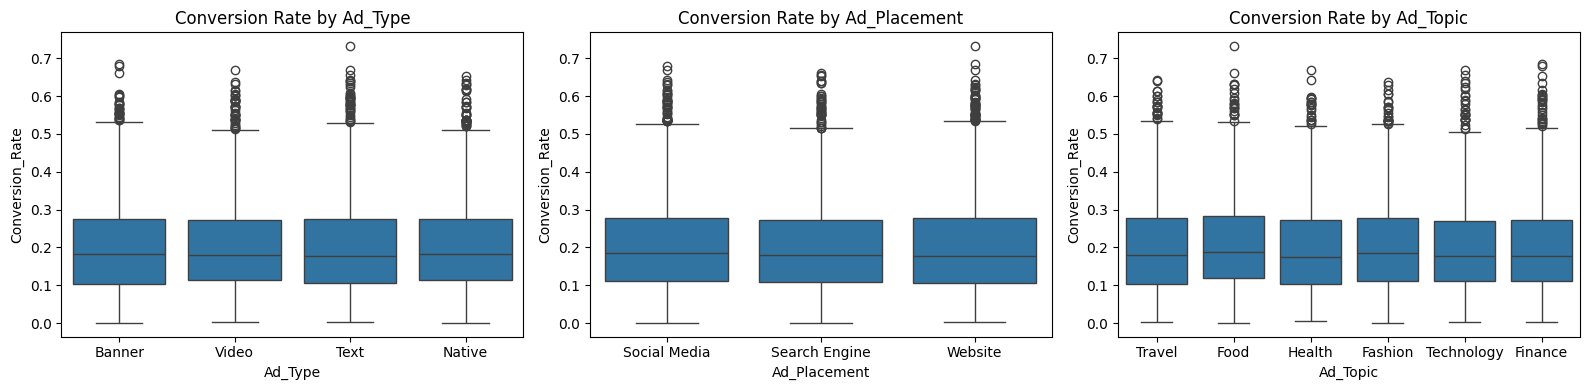

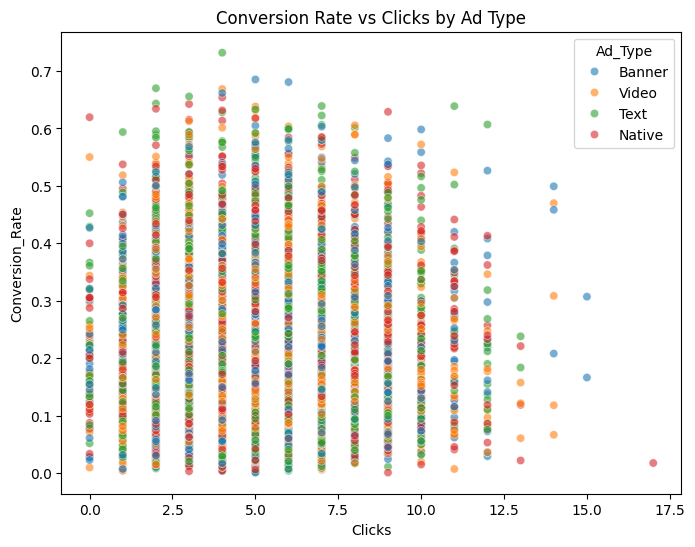

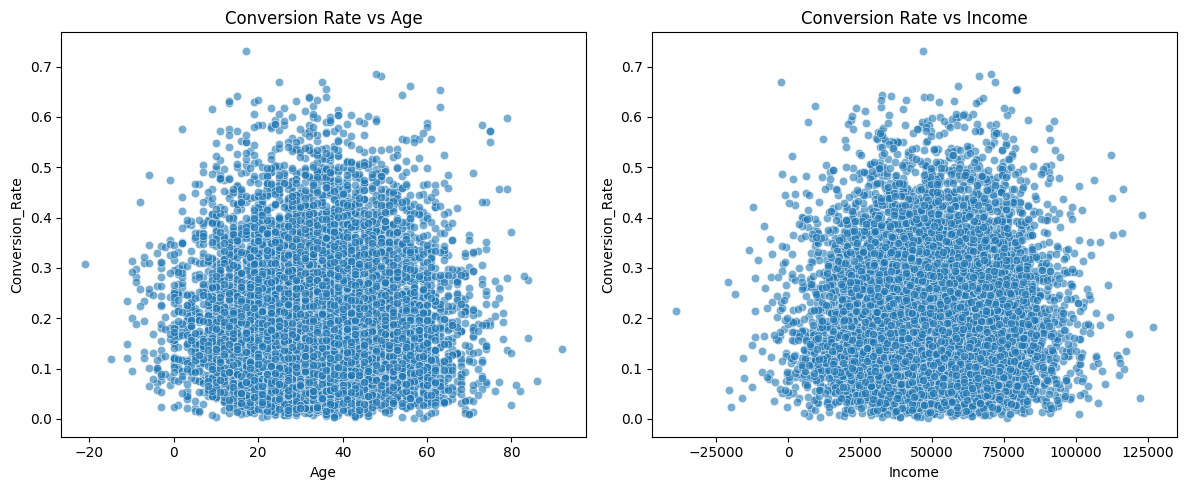

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame
# Make sure categorical variables are properly labeled
categorical_cols = ['Ad_Type', 'Ad_Placement', 'Ad_Topic']
for col in categorical_cols:
    df[col] = df[col].astype(str)

# 1. Boxplots: Conversion Rate by Ad Characteristics
plt.figure(figsize=(16, 4))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=col, y='Conversion_Rate', data=df)
    plt.title(f'Conversion Rate by {col}')
plt.tight_layout()
plt.show()

# 2. Scatter plot: Conversion Rate vs Clicks, colored by Ad_Type
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Clicks', y='Conversion_Rate', hue='Ad_Type', data=df, alpha=0.6)
plt.title('Conversion Rate vs Clicks by Ad Type')
plt.show()

# 3. Scatter plots: Conversion Rate vs Age and Income
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Conversion_Rate', data=df, alpha=0.6)
plt.title('Conversion Rate vs Age')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Income', y='Conversion_Rate', data=df, alpha=0.6)
plt.title('Conversion Rate vs Income')
plt.tight_layout()
plt.show()


In [99]:
"""
Alternative Causal Inference Methods When IV Fails
No instrumental variables required!
"""

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')


class AlternativeCausalMethods:
    """
    Causal inference methods that don't require instruments
    """
    
    def __init__(self, data):
        self.data = data.copy()
        self.propensity_scores = None
        self.matched_data = None
        
    # =========================================================================
    # METHOD 1: PROPENSITY SCORE MATCHING
    # =========================================================================
    
    def propensity_score_matching(self, treatment_var='Clicks', 
                                  outcome_var='Conversion_Rate',
                                  threshold=None,
                                  n_neighbors=1,
                                  caliper=0.1):
        """
        Propensity Score Matching: Match treated and control units based on 
        probability of treatment.
        
        Good when: You have observable confounders but no valid instrument
        
        Parameters:
        -----------
        treatment_var : str
            Variable to discretize into treatment (if continuous)
        outcome_var : str
            Outcome variable
        threshold : float
            Threshold to binarize treatment (if None, use median)
        n_neighbors : int
            Number of matches per treated unit
        caliper : float
            Maximum propensity score distance for matching
        """
        print("\n" + "="*70)
        print("METHOD 1: PROPENSITY SCORE MATCHING")
        print("="*70)
        
        # Binarize treatment if needed
        if threshold is None:
            threshold = self.data[treatment_var].median()
        
        self.data['Treatment'] = (self.data[treatment_var] > threshold).astype(int)
        
        print(f"\nTreatment definition: {treatment_var} > {threshold:.4f}")
        print(f"Treated units: {self.data['Treatment'].sum()}")
        print(f"Control units: {(1 - self.data['Treatment']).sum()}")
        
        # Define covariates (everything except treatment and outcome)
        exclude_cols = [treatment_var, outcome_var, 'Treatment', 'Click_Time']
        covariate_cols = [c for c in self.data.columns 
                         if c not in exclude_cols and self.data[c].dtype in ['int64', 'float64']]
        
        print(f"\nCovariates used: {len(covariate_cols)}")
        
        # Estimate propensity scores
        X = self.data[covariate_cols].fillna(self.data[covariate_cols].median())
        y = self.data['Treatment']
        
        # Use logistic regression for propensity scores
        ps_model = LogisticRegression(max_iter=1000, random_state=42)
        ps_model.fit(X, y)
        
        self.data['propensity_score'] = ps_model.predict_proba(X)[:, 1]
        self.propensity_scores = self.data['propensity_score']
        
        print(f"\nPropensity score range: [{self.propensity_scores.min():.4f}, "
              f"{self.propensity_scores.max():.4f}]")
        
        # Check overlap (common support)
        treated_ps = self.data[self.data['Treatment'] == 1]['propensity_score']
        control_ps = self.data[self.data['Treatment'] == 0]['propensity_score']
        
        overlap_min = max(treated_ps.min(), control_ps.min())
        overlap_max = min(treated_ps.max(), control_ps.max())
        
        print(f"Common support region: [{overlap_min:.4f}, {overlap_max:.4f}]")
        
        # Perform matching
        treated_indices = self.data[self.data['Treatment'] == 1].index
        control_indices = self.data[self.data['Treatment'] == 0].index
        
        treated_ps_values = self.data.loc[treated_indices, 'propensity_score'].values.reshape(-1, 1)
        control_ps_values = self.data.loc[control_indices, 'propensity_score'].values.reshape(-1, 1)
        
        # Find nearest neighbors
        nn = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
        nn.fit(control_ps_values)
        
        distances, indices = nn.kneighbors(treated_ps_values)
        
        # Apply caliper
        matched_pairs = []
        for i, (treated_idx, dist_array, match_indices) in enumerate(zip(treated_indices, distances, indices)):
            for dist, match_idx in zip(dist_array, match_indices):
                if dist <= caliper:
                    control_idx = control_indices[match_idx]
                    matched_pairs.append({
                        'treated_idx': treated_idx,
                        'control_idx': control_idx,
                        'distance': dist
                    })
        
        print(f"\nMatching results:")
        print(f"  Treated units matched: {len(set([p['treated_idx'] for p in matched_pairs]))}")
        print(f"  Total matched pairs: {len(matched_pairs)}")
        
        # Calculate treatment effect on matched sample
        if len(matched_pairs) > 0:
            treated_outcomes = []
            control_outcomes = []
            
            for pair in matched_pairs:
                treated_outcomes.append(self.data.loc[pair['treated_idx'], outcome_var])
                control_outcomes.append(self.data.loc[pair['control_idx'], outcome_var])
            
            ate = np.mean(treated_outcomes) - np.mean(control_outcomes)
            
            # T-test for significance
            t_stat, p_val = ttest_ind(treated_outcomes, control_outcomes)
            
            # Standard error
            se = np.sqrt(np.var(treated_outcomes)/len(treated_outcomes) + 
                        np.var(control_outcomes)/len(control_outcomes))
            
            print(f"\n{'='*70}")
            print(f"AVERAGE TREATMENT EFFECT (ATE)")
            print(f"{'='*70}")
            print(f"Effect size: {ate:.6f}")
            print(f"Standard error: {se:.6f}")
            print(f"95% CI: [{ate - 1.96*se:.6f}, {ate + 1.96*se:.6f}]")
            print(f"T-statistic: {t_stat:.4f}")
            print(f"P-value: {p_val:.4f}")
            print(f"Status: {'✓ Significant' if p_val < 0.05 else '✗ Not significant'}")
            
            return {
                'ate': ate,
                'se': se,
                'p_value': p_val,
                'n_matched': len(matched_pairs)
            }
        else:
            print("\n✗ No matches found within caliper distance")
            return None
    
    # =========================================================================
    # METHOD 2: INVERSE PROBABILITY WEIGHTING (IPW)
    # =========================================================================
    
    def inverse_probability_weighting(self, treatment_var='Clicks',
                                     outcome_var='Conversion_Rate',
                                     threshold=None):
        """
        Inverse Probability Weighting: Weight observations by inverse of 
        propensity to be treated.
        
        Good when: You want to use all data (not just matches)
        
        Less efficient than matching but uses full sample
        """
        print("\n" + "="*70)
        print("METHOD 2: INVERSE PROBABILITY WEIGHTING (IPW)")
        print("="*70)
        
        # Binarize treatment if needed
        if threshold is None:
            threshold = self.data[treatment_var].median()
        
        self.data['Treatment'] = (self.data[treatment_var] > threshold).astype(int)
        
        # Get propensity scores if not already estimated
        if self.propensity_scores is None:
            exclude_cols = [treatment_var, outcome_var, 'Treatment', 'Click_Time']
            covariate_cols = [c for c in self.data.columns 
                             if c not in exclude_cols and self.data[c].dtype in ['int64', 'float64']]
            
            X = self.data[covariate_cols].fillna(self.data[covariate_cols].median())
            y = self.data['Treatment']
            
            ps_model = LogisticRegression(max_iter=1000, random_state=42)
            ps_model.fit(X, y)
            self.data['propensity_score'] = ps_model.predict_proba(X)[:, 1]
        
        # Calculate IPW weights
        # For treated: 1 / propensity_score
        # For control: 1 / (1 - propensity_score)
        
        # Clip propensity scores to avoid extreme weights
        ps_clipped = self.data['propensity_score'].clip(0.01, 0.99)
        
        self.data['ipw_weight'] = np.where(
            self.data['Treatment'] == 1,
            1 / ps_clipped,
            1 / (1 - ps_clipped)
        )
        
        # Normalize weights
        treated_sum = self.data[self.data['Treatment'] == 1]['ipw_weight'].sum()
        control_sum = self.data[self.data['Treatment'] == 0]['ipw_weight'].sum()
        
        self.data['ipw_weight_norm'] = np.where(
            self.data['Treatment'] == 1,
            self.data['ipw_weight'] / treated_sum * self.data['Treatment'].sum(),
            self.data['ipw_weight'] / control_sum * (1 - self.data['Treatment']).sum()
        )
        
        print(f"\nWeight statistics:")
        print(f"  Mean weight: {self.data['ipw_weight'].mean():.4f}")
        print(f"  Max weight: {self.data['ipw_weight'].max():.4f}")
        print(f"  Min weight: {self.data['ipw_weight'].min():.4f}")
        
        # Calculate weighted treatment effect
        treated_weighted_mean = np.average(
            self.data[self.data['Treatment'] == 1][outcome_var],
            weights=self.data[self.data['Treatment'] == 1]['ipw_weight_norm']
        )
        
        control_weighted_mean = np.average(
            self.data[self.data['Treatment'] == 0][outcome_var],
            weights=self.data[self.data['Treatment'] == 0]['ipw_weight_norm']
        )
        
        ate = treated_weighted_mean - control_weighted_mean
        
        # Bootstrap standard errors
        n_bootstrap = 500
        boot_ates = []
        
        for _ in range(n_bootstrap):
            boot_idx = np.random.choice(len(self.data), size=len(self.data), replace=True)
            boot_data = self.data.iloc[boot_idx]
            
            treated_boot = np.average(
                boot_data[boot_data['Treatment'] == 1][outcome_var],
                weights=boot_data[boot_data['Treatment'] == 1]['ipw_weight_norm']
            )
            control_boot = np.average(
                boot_data[boot_data['Treatment'] == 0][outcome_var],
                weights=boot_data[boot_data['Treatment'] == 0]['ipw_weight_norm']
            )
            boot_ates.append(treated_boot - control_boot)
        
        se = np.std(boot_ates)
        
        print(f"\n{'='*70}")
        print(f"AVERAGE TREATMENT EFFECT (IPW)")
        print(f"{'='*70}")
        print(f"Effect size: {ate:.6f}")
        print(f"Standard error (bootstrapped): {se:.6f}")
        print(f"95% CI: [{ate - 1.96*se:.6f}, {ate + 1.96*se:.6f}]")
        
        return {
            'ate': ate,
            'se': se,
            'ci_lower': ate - 1.96*se,
            'ci_upper': ate + 1.96*se
        }
    
    # =========================================================================
    # METHOD 3: REGRESSION DISCONTINUITY DESIGN (RDD)
    # =========================================================================
    
    def regression_discontinuity(self, running_var, threshold, 
                                outcome_var='Conversion_Rate',
                                bandwidth=None):
        """
        Regression Discontinuity Design: Exploit discontinuous treatment assignment
        
        Good when: Treatment is assigned based on a threshold (e.g., Income > $50k)
        
        Example: Ads only shown to users with CTR > 0.05
        """
        print("\n" + "="*70)
        print("METHOD 3: REGRESSION DISCONTINUITY DESIGN")
        print("="*70)
        
        if running_var not in self.data.columns:
            print(f"✗ Running variable '{running_var}' not found")
            return None
        
        # Create treatment indicator
        self.data['Treatment_RDD'] = (self.data[running_var] > threshold).astype(int)
        
        # Center running variable at threshold
        self.data['running_centered'] = self.data[running_var] - threshold
        
        # Automatic bandwidth selection (if not provided)
        if bandwidth is None:
            bandwidth = self.data['running_centered'].abs().quantile(0.5)
        
        print(f"\nRDD Setup:")
        print(f"  Running variable: {running_var}")
        print(f"  Threshold: {threshold:.4f}")
        print(f"  Bandwidth: {bandwidth:.4f}")
        print(f"  Units just below threshold: {((self.data[running_var] >= threshold - bandwidth) & (self.data[running_var] < threshold)).sum()}")
        print(f"  Units just above threshold: {((self.data[running_var] >= threshold) & (self.data[running_var] <= threshold + bandwidth)).sum()}")
        
        # Restrict to bandwidth
        rdd_data = self.data[
            (self.data['running_centered'].abs() <= bandwidth)
        ].copy()
        
        if len(rdd_data) < 50:
            print(f"\n⚠ Warning: Only {len(rdd_data)} observations within bandwidth")
            print("  Consider increasing bandwidth or using different method")
            return None
        
        # Local linear regression
        X = sm.add_constant(pd.DataFrame({
            'Treatment': rdd_data['Treatment_RDD'],
            'running': rdd_data['running_centered'],
            'running_x_treatment': rdd_data['running_centered'] * rdd_data['Treatment_RDD']
        }))
        
        y = rdd_data[outcome_var]
        
        model = sm.OLS(y, X).fit()
        
        # Treatment effect is coefficient on Treatment dummy
        ate = model.params['Treatment']
        se = model.bse['Treatment']
        p_val = model.pvalues['Treatment']
        
        print(f"\n{'='*70}")
        print(f"REGRESSION DISCONTINUITY ESTIMATE")
        print(f"{'='*70}")
        print(f"Effect size: {ate:.6f}")
        print(f"Standard error: {se:.6f}")
        print(f"95% CI: [{ate - 1.96*se:.6f}, {ate + 1.96*se:.6f}]")
        print(f"P-value: {p_val:.4f}")
        print(f"Status: {'✓ Significant' if p_val < 0.05 else '✗ Not significant'}")
        
        print(f"\nFull regression results:")
        print(model.summary().tables[1])
        
        return {
            'ate': ate,
            'se': se,
            'p_value': p_val,
            'n_bandwidth': len(rdd_data)
        }
    
    # =========================================================================
    # METHOD 4: DOUBLY ROBUST ESTIMATION
    # =========================================================================
    
    def doubly_robust_estimation(self, treatment_var='Clicks',
                                outcome_var='Conversion_Rate',
                                threshold=None):
        """
        Doubly Robust Estimation: Combines propensity score and outcome regression
        
        Good when: You want protection against misspecification
        
        Works if EITHER propensity or outcome model is correct
        """
        print("\n" + "="*70)
        print("METHOD 4: DOUBLY ROBUST ESTIMATION")
        print("="*70)
        
        # Binarize treatment
        if threshold is None:
            threshold = self.data[treatment_var].median()
        
        self.data['Treatment'] = (self.data[treatment_var] > threshold).astype(int)
        
        # Define covariates
        exclude_cols = [treatment_var, outcome_var, 'Treatment', 'Click_Time']
        covariate_cols = [c for c in self.data.columns 
                         if c not in exclude_cols and self.data[c].dtype in ['int64', 'float64']]
        
        X = self.data[covariate_cols].fillna(self.data[covariate_cols].median())
        
        print(f"\nEstimating propensity scores...")
        # Step 1: Estimate propensity scores
        ps_model = LogisticRegression(max_iter=1000, random_state=42)
        ps_model.fit(X, self.data['Treatment'])
        ps = ps_model.predict_proba(X)[:, 1].clip(0.01, 0.99)
        
        print(f"Estimating outcome models...")
        # Step 2: Estimate outcome models for treated and control
        # Treated outcome model
        treated_data = self.data[self.data['Treatment'] == 1]
        X_treated = X[self.data['Treatment'] == 1]
        y_treated = treated_data[outcome_var]
        
        outcome_model_1 = RandomForestRegressor(n_estimators=100, random_state=42)
        outcome_model_1.fit(X_treated, y_treated)
        mu1 = outcome_model_1.predict(X)
        
        # Control outcome model
        control_data = self.data[self.data['Treatment'] == 0]
        X_control = X[self.data['Treatment'] == 0]
        y_control = control_data[outcome_var]
        
        outcome_model_0 = RandomForestRegressor(n_estimators=100, random_state=42)
        outcome_model_0.fit(X_control, y_control)
        mu0 = outcome_model_0.predict(X)
        
        # Step 3: Doubly robust estimation
        W = self.data['Treatment'].values
        Y = self.data[outcome_var].values
        
        # DR estimator
        dr_treated = mu1 + (W / ps) * (Y - mu1)
        dr_control = mu0 + ((1 - W) / (1 - ps)) * (Y - mu0)
        
        ate = np.mean(dr_treated - dr_control)
        
        # Bootstrap standard errors
        n_bootstrap = 500
        boot_ates = []
        
        for _ in range(n_bootstrap):
            boot_idx = np.random.choice(len(self.data), size=len(self.data), replace=True)
            dr_treated_boot = dr_treated[boot_idx]
            dr_control_boot = dr_control[boot_idx]
            boot_ates.append(np.mean(dr_treated_boot - dr_control_boot))
        
        se = np.std(boot_ates)
        
        print(f"\n{'='*70}")
        print(f"DOUBLY ROBUST ESTIMATE")
        print(f"{'='*70}")
        print(f"Effect size: {ate:.6f}")
        print(f"Standard error (bootstrapped): {se:.6f}")
        print(f"95% CI: [{ate - 1.96*se:.6f}, {ate + 1.96*se:.6f}]")
        
        print(f"\n✓ Doubly robust: Valid if EITHER propensity or outcome model is correct")
        
        return {
            'ate': ate,
            'se': se,
            'ci_lower': ate - 1.96*se,
            'ci_upper': ate + 1.96*se
        }


# ============================================================================
# EXAMPLE USAGE
# ============================================================================

if __name__ == "__main__":
    # Load data
    df = pd.read_csv('../datasets/project/Dataset_Ads.csv')
    
    # Initialize
    causal = AlternativeCausalMethods(df)
    
    print("\n" + "="*70)
    print("ALTERNATIVE CAUSAL INFERENCE METHODS DEMONSTRATION")
    print("="*70)
    
    # Method 1: Propensity Score Matching
    print("\n\n" + "🎯 Running Propensity Score Matching...")
    psm_results = causal.propensity_score_matching(
        treatment_var='Clicks',
        outcome_var='Conversion_Rate',
        threshold=None,  # Use median
        caliper=0.1
    )
    
    # Method 2: Inverse Probability Weighting
    print("\n\n" + "⚖️ Running Inverse Probability Weighting...")
    ipw_results = causal.inverse_probability_weighting(
        treatment_var='Clicks',
        outcome_var='Conversion_Rate'
    )
    
    # Method 3: Regression Discontinuity (if applicable)
    print("\n\n" + "📊 Running Regression Discontinuity...")
    print("(Assuming ads are only shown to users with Income > 50000)")
    rdd_results = causal.regression_discontinuity(
        running_var='Income',
        threshold=50000,
        outcome_var='Conversion_Rate'
    )
    
    # Method 4: Doubly Robust
    print("\n\n" + "🛡️ Running Doubly Robust Estimation...")
    dr_results = causal.doubly_robust_estimation(
        treatment_var='Clicks',
        outcome_var='Conversion_Rate'
    )
    
    print("\n\n" + "="*70)
    print("ALL METHODS COMPLETE")
    print("="*70)


ALTERNATIVE CAUSAL INFERENCE METHODS DEMONSTRATION


🎯 Running Propensity Score Matching...

METHOD 1: PROPENSITY SCORE MATCHING

Treatment definition: Clicks > 5.0000
Treated units: 3889
Control units: 6111

Covariates used: 3

Propensity score range: [0.3629, 0.4140]
Common support region: [0.3640, 0.4140]

Matching results:
  Treated units matched: 3889
  Total matched pairs: 3889

AVERAGE TREATMENT EFFECT (ATE)
Effect size: -0.000466
Standard error: 0.002755
95% CI: [-0.005865, 0.004934]
T-statistic: -0.1690
P-value: 0.8658
Status: ✗ Not significant


⚖️ Running Inverse Probability Weighting...

METHOD 2: INVERSE PROBABILITY WEIGHTING (IPW)

Weight statistics:
  Mean weight: 2.0000
  Max weight: 2.7472
  Min weight: 1.5697

AVERAGE TREATMENT EFFECT (IPW)
Effect size: 0.002313
Standard error (bootstrapped): 0.002561
95% CI: [-0.002706, 0.007333]


📊 Running Regression Discontinuity...
(Assuming ads are only shown to users with Income > 50000)

METHOD 3: REGRESSION DISCONTINUITY DES